# Parkinson’s disease


# Importing Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Z score scalar
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold

# models

# logistic regression
from sklearn.linear_model import LogisticRegression
# decision tree
from sklearn.tree import DecisionTreeClassifier
# random forest
from sklearn.ensemble import RandomForestClassifier
# xgboost
from xgboost import XGBClassifier
# PCA
from sklearn.decomposition import PCA
# support vector machine
from sklearn import svm 

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# saving the model
import pickle


# Data Analysis

In [113]:
df = pd.read_csv("parkinsons.csv")


    Data Set Characteristics: Multivariate
    Number of Instances: 197
    Area: Life
    Attribute Characteristics: Real
    Number of Attributes: 23
    Date Donated: 2008-06-26
    Associated Tasks: Classification
    Missing Values? N/A


-----------------------------------------------------

# Attribute Information:

Matrix column entries (attributes):

    name - ASCII subject name and recording number
    MDVP:Fo(Hz) - Average vocal fundamental frequency
    MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
    measures of variation in fundamental frequency
    MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
    NHR,HNR - Two measures of ratio of noise to tonal components in the voice
    status - Health status of the subject (one) - Parkinson's, (zero) - healthy
    RPDE,D2 - Two nonlinear dynamical complexity measures
    DFA - Signal fractal scaling exponent
    spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

-----------------------------------------------------



In [114]:
df.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

In [115]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

No missing values

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

1. **MDVP:Fo(Hz) - Average vocal fundamental frequency:**
   - This attribute represents the average (mean) frequency of the vocal fundamental tone in Hertz (Hz). It's a measure of the average pitch of a person's voice.

2. **MDVP:Fhi(Hz) - Maximum vocal fundamental frequency:**
   - This attribute represents the maximum vocal fundamental frequency in Hertz. It indicates the highest pitch reached during vocalization.

3. **MDVP:Flo(Hz) - Minimum vocal fundamental frequency:**
   - This attribute represents the minimum vocal fundamental frequency in Hertz. It indicates the lowest pitch reached during vocalization.

4. **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP:**
   - These attributes are measures of variation in the fundamental frequency (pitch) of the voice.
   - MDVP:Jitter(%) is the percentage of variation in pitch.
   - MDVP:Jitter(Abs) is the absolute difference in pitch between consecutive periods.
   - MDVP:RAP is the relative average perturbation, a measure of pitch variation.
   - MDVP:PPQ is the five-point period perturbation quotient.
   - Jitter:DDP is the average absolute difference of differences between consecutive periods.

5. **MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA:**
   - These attributes are measures of variation in amplitude (intensity) of the voice.
   - MDVP:Shimmer represents the overall variation in amplitude.
   - MDVP:Shimmer(dB) is the shimmer in decibels, a measure of amplitude variation in dB.
   - Shimmer:APQ3 and Shimmer:APQ5 are amplitude perturbation quotients.
   - MDVP:APQ is the 11-point amplitude perturbation quotient.
   - Shimmer:DDA is the average absolute differences between consecutive amplitude peaks.

6. **NHR - Noise-to-Harmonics Ratio:**
   - NHR is a measure of the ratio of noise to tonal components in the voice. It quantifies the noisiness of the voice.

7. **HNR - Harmonic-to-Noise Ratio:**
   - HNR is another measure of the ratio of harmonics (tonal components) to noise in the voice. It is used to assess voice quality.

8. **Status - Health status of the subject:**
   - This attribute is a binary variable indicating the health status of the subject. '1' typically represents individuals with Parkinson's disease, and '0' represents healthy individuals.

9. **RPDE, D2 - Two nonlinear dynamical complexity measures:**
   - RPDE and D2 are measures of nonlinear dynamical complexity in the voice signal. They provide insights into the complexity and irregularity of the voice.

10. **DFA - Signal fractal scaling exponent:**
    - DFA is a measure of the fractal scaling properties of the voice signal. It characterizes the self-similarity and long-range correlations in the signal.

11. **Spread1, Spread2, PPE - Three nonlinear measures of fundamental frequency variation:**
    - These attributes are nonlinear measures of variation in the fundamental frequency of the voice signal. They provide additional insights into pitch dynamics.

These attributes are commonly used in voice analysis, particularly in the diagnosis and monitoring of Parkinson's disease. Researchers and healthcare professionals use them to assess vocal characteristics and detect potential indicators of the disease.

In [117]:
df.shape

(195, 24)

So we have 24 attributes and 195 data points

In [118]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [119]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [120]:
df['name'].is_unique

True

In [121]:
# name is although unique but not useful for model training 
# drop name

df.drop(['name'], axis=1, inplace=True)


In [122]:
df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

In [123]:
# lets take a look at status

df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [124]:
df.groupby('status').mean()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR        HNR  \
status                    ...                                               
0               0.162958  ...  0.013305     0.028511  0.011483  24.678750   
1               0.321204  ...  0.027600     0.053027  0.029211  20.974048   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                              
0       0.442552  0.695716 -6.759264  0.160292  2.154491  0.123017  
1       0.516816  0.725408 -5.333420  0.248133  2.456058  0.233828  

[2 rows x 22 columns]

In [125]:
df.groupby('status').median()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0           198.996      231.1615      113.9385        0.003355   
1           145.174      163.3350       99.7700        0.005440   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000025  0.001625  0.001775    0.004875      0.016705   
1               0.000040  0.002840  0.003140    0.008530      0.028380   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR     HNR  \
status                    ...                                            
0                  0.154  ...  0.013015      0.02633  0.004825  24.997   
1                  0.263  ...  0.021570      0.04451  0.016580  21.414   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                              
0       0.435368  0.682527 -6.826448  0.167356  2.129510  0.115118  
1       0.530529  0.726652 -5.440040  0.240875  2.439597  0.222716  

[2 rows x 22 columns]

In [126]:
df.groupby('status').quantile(0.25) # Q1


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0          120.9475     139.41325      98.24375        0.002655   
1          117.5720     133.77650      80.87550        0.004005   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0                0.00001  0.001332   0.00148    0.003998      0.014475   
1                0.00003  0.002030   0.00219    0.006085      0.018295   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
status                    ...                                              
0                  0.129  ...  0.011235      0.02206  0.004188  22.99325   
1                  0.168  ...  0.015555      0.02740  0.008445  18.78200   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                              
0       0.372126  0.654291 -7.257665  0.120623  1.974217  0.094658  
1       0.439064  0.685569 -6.038300  0.199507  2.180933  0.170103  

[2 rows x 22 columns]

In [127]:
df.groupby('status').quantile(0.75) # Q3


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0           229.077     251.23925       199.183         0.00453   
1           170.071     207.16050       129.240         0.00767   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0                0.00003  0.001908  0.002228    0.005725      0.020210   
1                0.00006  0.004100  0.004360    0.012300      0.042525   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
status                    ...                                              
0                0.18925  ...  0.015945     0.034540  0.009213  26.13925   
1                0.39450  ...  0.034825     0.068455  0.027960  24.16450   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                              
0       0.507748  0.742284 -6.350146  0.193766  2.339487  0.147761  
1       0.604573  0.764868 -4.664067  0.303660  2.668479  0.274397  

[2 rows x 22 columns]

In [128]:
df.groupby('status').min()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0           110.739       113.597        74.287         0.00178   
1            88.333       102.145        65.476         0.00168   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000007   0.00092   0.00106     0.00276       0.00954   
1               0.000010   0.00068   0.00092     0.00204       0.01022   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR  \
status                    ...                                           
0                  0.085  ...   0.00719      0.01403  0.00065  17.883   
1                  0.090  ...   0.00811      0.01364  0.00231   8.441   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                              
0       0.256570  0.626710 -7.964984  0.006274  1.423287  0.044539  
1       0.263654  0.574282 -7.120925  0.063412  1.765957  0.093193  

[2 rows x 22 columns]

In [129]:
df.groupby('status').max()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0           260.105       592.030        239.17         0.01360   
1           223.361       588.518        199.02         0.03316   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0                0.00008   0.00624   0.00564     0.01873       0.04087   
1                0.00026   0.02144   0.01958     0.06433       0.11908   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR  \
status                    ...                                           
0                  0.405  ...   0.02745      0.07008  0.10715  33.047   
1                  1.302  ...   0.13778      0.16942  0.31482  29.928   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                              
0       0.663842  0.785714 -5.198864  0.291954  2.882450  0.252404  
1       0.685151  0.825288 -2.434031  0.450493  3.671155  0.527367  

[2 rows x 22 columns]

In [130]:
# lets see if we can find any co-relation in the features

df.corr() # by default takes pearson correlation method


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

<AxesSubplot:>

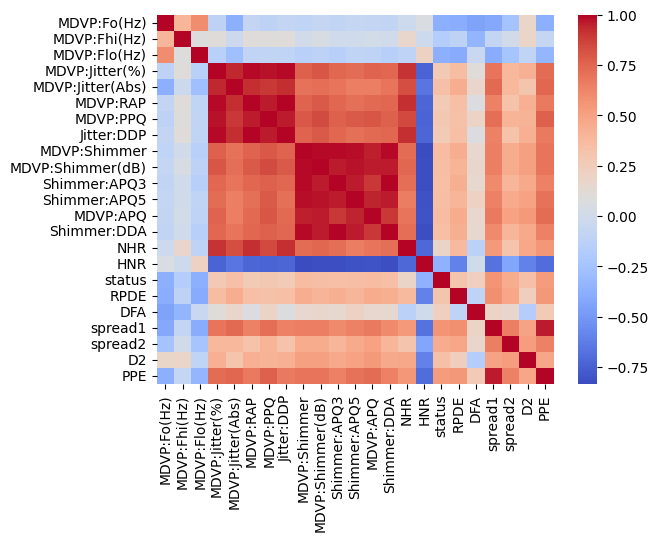

In [131]:
sns.heatmap(df.corr(),cmap="coolwarm")

In [132]:
correlation_matrix_spearman = df.corr(method='spearman')

<AxesSubplot:>

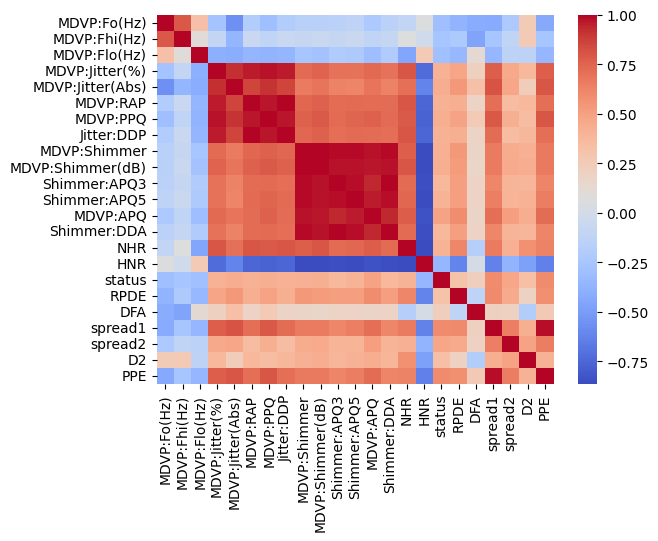

In [133]:
sns.heatmap(correlation_matrix_spearman,cmap="coolwarm")

In [134]:
Y=df["status"]
X=df.drop(["status"],axis=1)


In [135]:
X.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031   
1   0.04368      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192   
2   0.03590      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179   
3   0.03772      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501   
4   0.04465      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 22 columns]

In [136]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [137]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [138]:
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to generate synthetic samples
X, Y = smote.fit_resample(X, Y)


In [139]:
# Count the occurrences of each class in the resampled data
class_counts = Y.value_counts()

print("Class distribution after SMOTE:")
print(class_counts)


Class distribution after SMOTE:
1    147
0    147
Name: status, dtype: int64


In [140]:
X

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0     119.992000    157.302000     74.997000        0.007840   
1     122.400000    148.650000    113.819000        0.009680   
2     116.682000    131.111000    111.555000        0.010500   
3     116.676000    137.871000    111.366000        0.009970   
4     116.014000    141.781000    110.655000        0.012840   
..           ...           ...           ...             ...   
289   243.119163    250.727397    232.063941        0.002145   
290   113.951292    117.202033     94.052415        0.003429   
291   191.203091    413.870166     76.678321        0.006966   
292   119.839649    198.941635    104.078872        0.005212   
293   178.003340    236.762543     76.678780        0.012793   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            0.000070  0.003700  0.005540    0.011090      0.043740   
1            0.000080  0.004650  0.006960    0.013940      0.061340   
2            0.000090  0.005440  0.007810    0.016330      0.052330   
3            0.000090  0.005020  0.006980    0.015050      0.054920   
4            0.000110  0.006550  0.009080    0.019660      0.064250   
..                ...       ...       ...         ...           ...   
289          0.000009  0.001121  0.001393    0.003363      0.014361   
290          0.000030  0.001640  0.001977    0.004931      0.013920   
291          0.000038  0.003466  0.003678    0.010389      0.022046   
292          0.000048  0.002372  0.003070    0.007117      0.019634   
293          0.000074  0.006046  0.005472    0.018146      0.022890   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR        HNR  \
0            0.426000  ...  0.029710     0.065450  0.022110  21.033000   
1            0.626000  ...  0.043680     0.094030  0.019290  19.085000   
2            0.482000  ...  0.035900     0.082700  0.013090  20.651000   
3            0.517000  ...  0.037720     0.087710  0.013530  20.644000   
4            0.584000  ...  0.044650     0.104700  0.017670  19.649000   
..                ...  ...       ...          ...       ...        ...   
289          0.127956  ...  0.010381     0.023698  0.004687  25.232508   
290          0.125477  ...  0.011332     0.020853  0.005407  26.053238   
291          0.229625  ...  0.015473     0.036195  0.066228  19.570680   
292          0.178572  ...  0.018018     0.028504  0.010125  22.886095   
293          0.246292  ...  0.016340     0.038086  0.093562  18.083824   

         RPDE       DFA   spread1   spread2        D2       PPE  
0    0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654  
1    0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674  
2    0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634  
3    0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975  
4    0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335  
..        ...       ...       ...       ...       ...       ...  
289  0.431437  0.636257 -7.070877  0.091970  2.335149  0.091653  
290  0.429030  0.736727 -6.157144  0.180320  1.869664  0.163543  
291  0.458309  0.645784 -6.709208  0.199123  2.139844  0.124734  
292  0.605519  0.687467 -5.591254  0.221884  2.145160  0.227271  
293  0.402446  0.665758 -6.634997  0.159333  2.709139  0.142037  

[294 rows x 22 columns]

In [141]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

# Data Standardization

In [142]:
scalar = StandardScaler()
scalar.fit(X)

StandardScaler()

# PCA

In [143]:
# Standardize the data (center and scale)
X_scaled = scalar.transform(X)
# Convert the scaled data back to a DataFrame with the same column names
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Perform PCA
n_components = None  # Set the number of components or keep it as None
pca = PCA(n_components=n_components)

# Fit and transform the data
X_pca = pca.fit_transform(scaled_df)


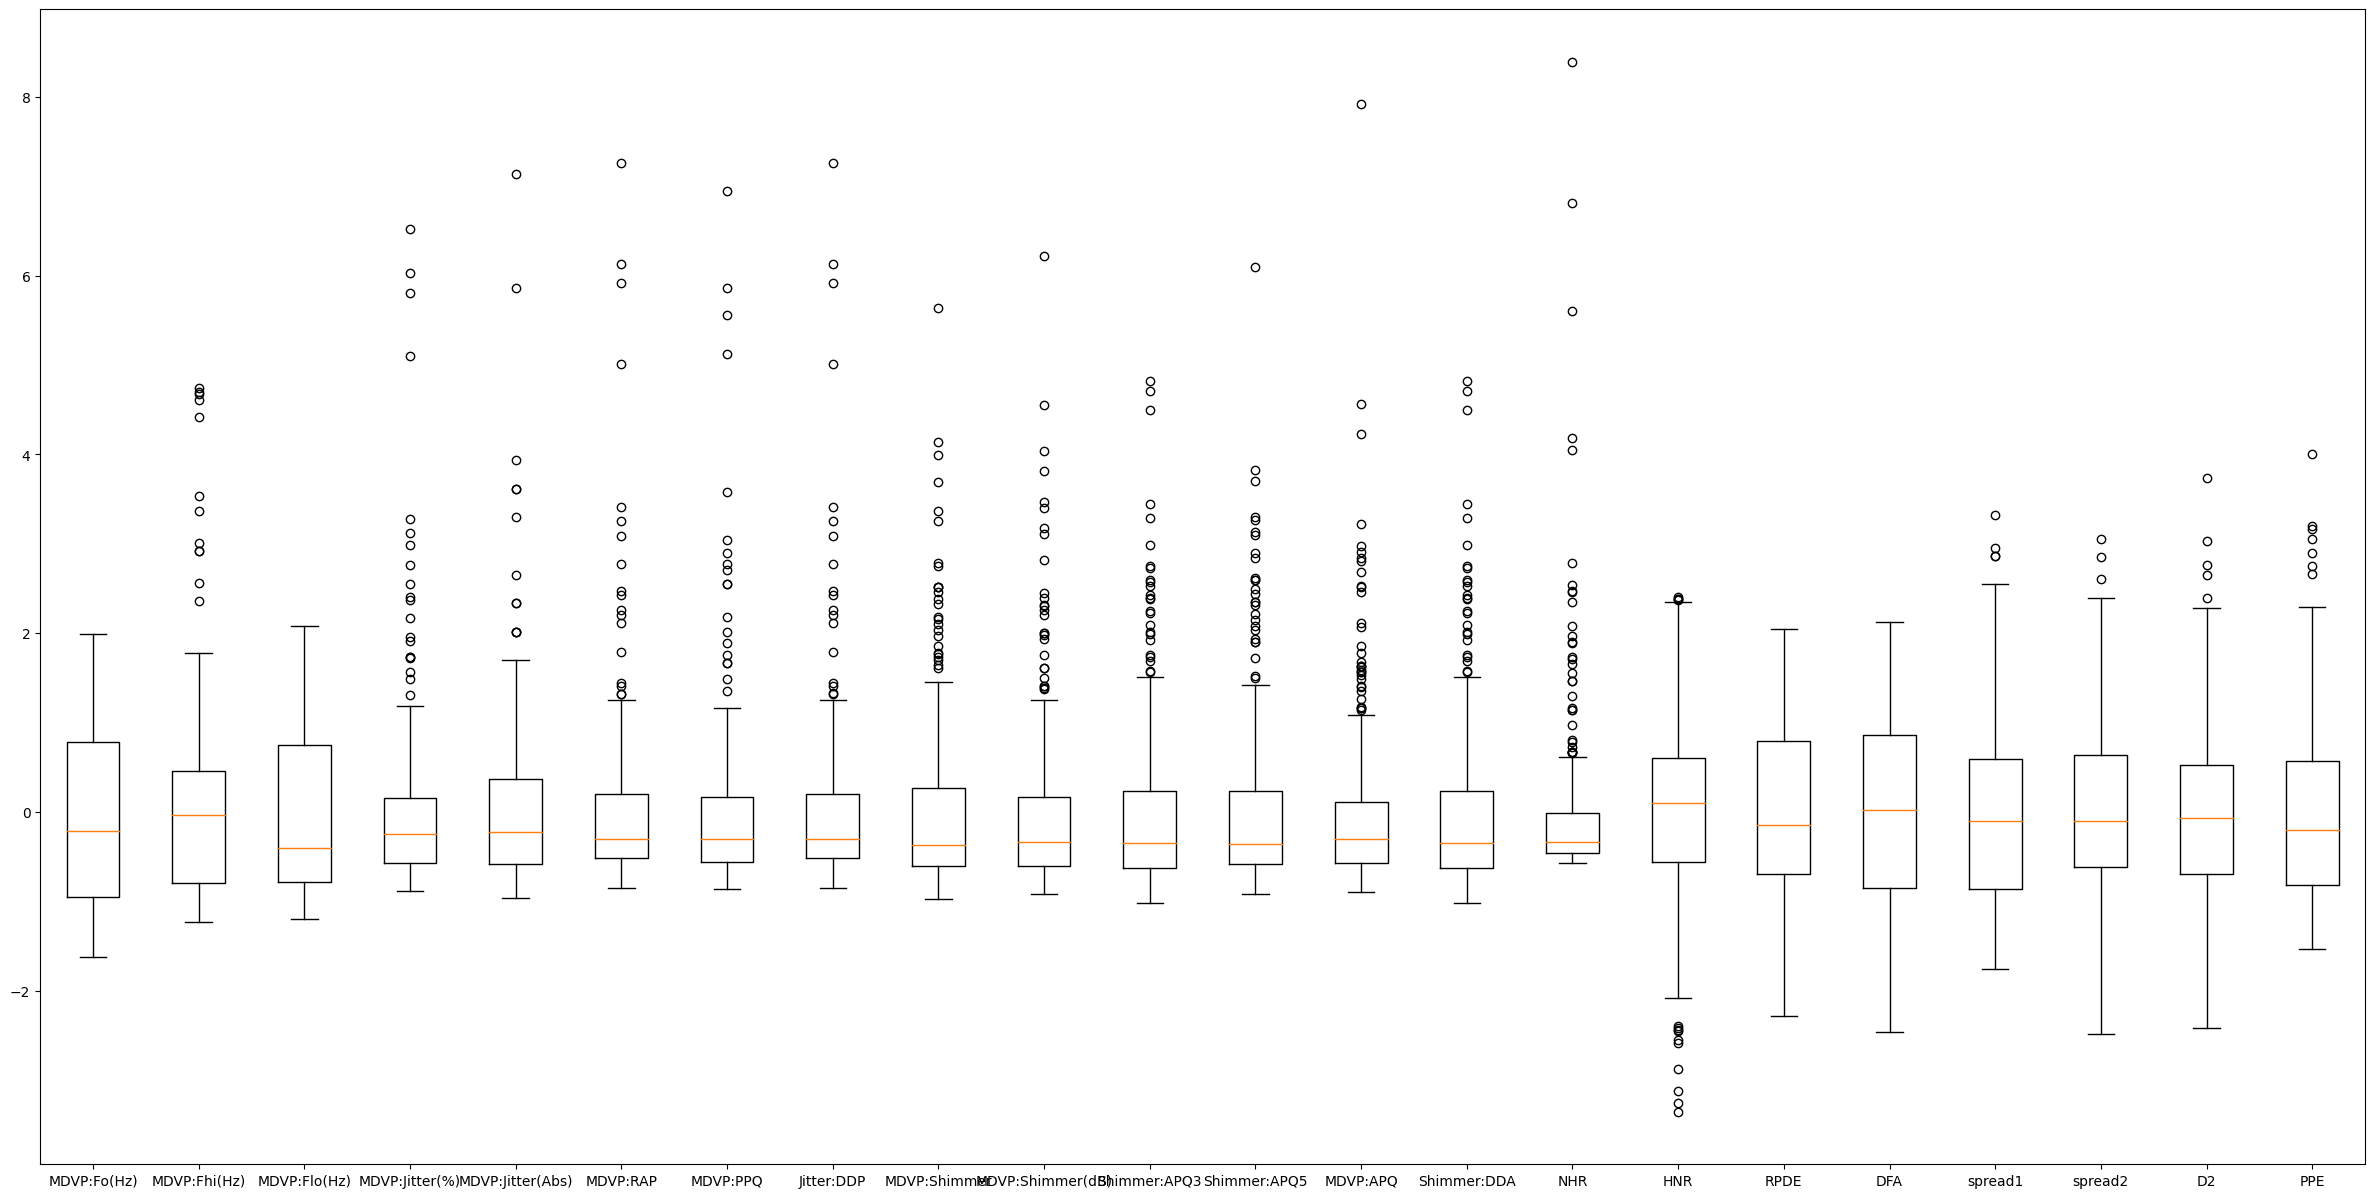

In [144]:
plt.figure(figsize=(30, 15))
plt.boxplot(scaled_df,labels=scaled_df.columns)
plt.show()

In [145]:
X_pca
col=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
    'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
    'PC21','PC22']
df_pca=pd.DataFrame(X_pca, columns=col)

In [146]:
df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

In [147]:
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.351645 -1.758387  1.584905  0.413548  0.971238  0.814468  0.103461   
1  6.228635 -1.511881  2.647263 -0.622299  1.187497  0.053816  0.392049   
2  5.305883 -1.651190  2.232372  0.716290  1.189968 -0.055849  0.168415   
3  5.600862 -1.798677  2.246566  0.128998  1.348006 -0.095426  0.238040   
4  7.343757 -1.176047  2.840712  0.977649  0.798430  0.393495  0.239462   

        PC8       PC9      PC10  ...      PC13      PC14      PC15      PC16  \
0 -0.491126  0.187607  0.216527  ... -0.004396 -0.468452  0.262785  0.290651   
1 -0.781589  0.565865 -0.023225  ... -0.267192 -0.610851  0.349906  0.194441   
2 -0.690158  0.375554  0.081934  ... -0.663603 -0.613422  0.427079  0.003474   
3 -0.785914  0.660586 -0.075304  ... -0.440996 -0.596082  0.216261  0.058033   
4 -1.890425  0.809358 -0.129113  ... -0.632425 -0.810812  0.279133  0.018368   

       PC17      PC18      PC19      PC20      PC21      PC22  
0 -0.109816  0.068856  0.020700  0.082066  0.000687  0.000272  
1 -0.031365  0.162580  0.196905  0.012484  0.000971 -0.000238  
2 -0.143095 -0.143497 -0.058813  0.056018 -0.000967  0.000211  
3 -0.152084 -0.021883  0.063253 -0.000191  0.001107  0.000293  
4 -0.168410 -0.272534  0.062497 -0.014393 -0.000412  0.000028  

[5 rows x 22 columns]

In [148]:
# Access the PCA components (principal axes)
principal_components = pca.components_

# Access the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance= pca.explained_variance_

# Access the singular values (eigenvalues)
singular_values = pca.singular_values_

# Access the mean (center) of the data
mean = scalar.mean_

# Access the scaling factors (standard deviations)
std_deviation = scalar.scale_

# Access the principal components (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


In [149]:

# Print the explained variance ratio for each component
print("Explained Variance Ratio:")
print(explained_variance_ratio)


Explained Variance Ratio:
[6.00503546e-01 1.28225126e-01 6.36981465e-02 6.24773935e-02
 3.56019129e-02 2.91715652e-02 2.65832107e-02 1.68705727e-02
 1.08851858e-02 7.51740466e-03 5.94576722e-03 4.73134133e-03
 3.20986030e-03 1.64960063e-03 1.01136215e-03 7.45661501e-04
 5.54654385e-04 3.81866728e-04 1.91949672e-04 4.38527989e-05
 1.81017698e-08 1.76192398e-09]


In [150]:

# Print the explained variance ratio for each component
print("Explained Variance: ")
print(explained_variance)


Explained Variance: 
[1.32561670e+01 2.83058059e+00 1.40614202e+00 1.37919379e+00
 7.85915265e-01 6.43964790e-01 5.86826644e-01 3.72419332e-01
 2.40291406e-01 1.65947349e-01 1.31253319e-01 1.04444764e-01
 7.08579399e-02 3.64150747e-02 2.23259057e-02 1.64605412e-02
 1.22440429e-02 8.42974061e-03 4.23730539e-03 9.68054277e-04
 3.99598114e-07 3.88946221e-08]


In [151]:

# Print the summary of the PCA
print("Principal Components:")
print(principal_components)


Principal Components:
[[-8.72457259e-02 -7.48119144e-03 -1.05837877e-01  2.51602523e-01
   2.43208020e-01  2.46613774e-01  2.53970617e-01  2.46609829e-01
   2.57377002e-01  2.58909147e-01  2.50752821e-01  2.50139046e-01
   2.52391726e-01  2.50752551e-01  2.26178237e-01 -2.34693530e-01
   1.49048042e-01  5.23333092e-02  2.25758842e-01  1.58866044e-01
   1.60504466e-01  2.32551157e-01]
 [ 5.15260807e-01  3.81826125e-01  3.53618141e-01  8.49954460e-02
  -6.99736802e-02  1.32345296e-01  7.88186960e-02  1.32312896e-01
   5.60431751e-02  7.79346086e-02  7.03333185e-02  5.90012974e-02
   3.29076642e-02  7.03463108e-02  1.86813499e-01 -8.28448637e-02
  -1.96013171e-01 -3.69446434e-01 -2.15598708e-01 -2.50634659e-01
   1.48048851e-01 -1.96842431e-01]
 [ 7.48925750e-02 -3.07195095e-01  3.09570552e-01 -9.92244127e-02
  -1.33141921e-01 -8.36438651e-02 -2.06575650e-02 -8.36433907e-02
   2.21810166e-01  2.07070129e-01  2.35469609e-01  2.63465996e-01
   1.89312482e-01  2.35472927e-01 -1.76895404e-01 

In [152]:
print("Singular Values (Eigenvalues):")
print(singular_values)


Singular Values (Eigenvalues):
[6.23222026e+01 2.87986130e+01 2.02977736e+01 2.01023327e+01
 1.51747545e+01 1.37361451e+01 1.31125972e+01 1.04459975e+01
 8.39079150e+00 6.97298884e+00 6.20138875e+00 5.53193598e+00
 4.55646534e+00 3.26643795e+00 2.55763375e+00 2.19611898e+00
 1.89407090e+00 1.57159600e+00 1.11423987e+00 5.32578542e-01
 1.08204550e-02 3.37581461e-03]


In [153]:
print("Mean (Center):")
print(mean)


Mean (Center):
[ 1.65479911e+02  2.03467884e+02  1.29158159e+02  5.46224623e-03
  3.71132838e-05  2.85355493e-03  2.99399676e-03  8.56137446e-03
  2.56241682e-02  2.42293965e-01  1.35926543e-02  1.53733781e-02
  2.04324779e-02  4.07782968e-02  2.07710008e-02  2.27872623e+01
  4.82404543e-01  7.09151875e-01 -6.05324897e+00  2.05374955e-01
  2.30825947e+00  1.78460296e-01]


In [154]:
print("Standard Deviations (Scaling Factors):")
print(std_deviation)


Standard Deviations (Scaling Factors):
[4.74663857e+01 8.19965887e+01 5.30335281e+01 4.24519203e-03
 3.12187181e-05 2.55886557e-03 2.38856554e-03 7.67676910e-03
 1.65674103e-02 1.70250428e-01 8.89500235e-03 1.04913060e-02
 1.48202219e-02 2.66847647e-02 3.50308765e-02 4.27444895e+00
 9.90365895e-02 5.47982502e-02 1.08969844e+00 8.02275901e-02
 3.65231241e-01 8.71752920e-02]


In [155]:
print("Principal Components (Loadings):")
print(loadings)

Principal Components (Loadings):
[[-3.17653134e-01  8.66891754e-01  8.88082590e-02 -1.62255583e-01
   8.14587242e-02 -1.50646445e-01 -5.50992028e-02 -2.53265188e-02
  -3.09288998e-02  2.51839334e-01 -5.31554559e-02  1.16673474e-01
   3.44033387e-02 -1.39814079e-02 -2.44055612e-02  3.04998266e-02
  -6.44978039e-03  1.94141770e-03 -4.35594127e-03  2.44413521e-06
  -2.11634263e-07 -4.82166401e-09]
 [-2.72382845e-02  6.42396849e-01 -3.64274583e-01 -9.42919967e-02
   3.34177915e-01  2.43708829e-01  5.10482175e-01 -8.04139041e-02
  -6.35888035e-02 -7.76936750e-02  9.34096071e-03 -7.31031461e-03
  -2.71500613e-04  5.46462158e-03 -3.05210389e-03 -1.02809688e-03
  -4.57948246e-03 -1.05334091e-03  3.31816282e-04 -1.57043955e-04
  -1.87578947e-08  1.71651343e-09]
 [-3.85345332e-01  5.94938808e-01  3.67091421e-01  4.34047868e-02
   6.65454527e-02 -5.58044290e-01  2.69067346e-02 -7.93776014e-02
  -4.38375540e-02 -1.93184655e-01 -8.14126767e-04 -4.49363063e-02
   9.52235949e-03  7.37604765e-03  5.61

c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PC1
- PC10
- PC11
- PC12
- PC13
- ...
Feature names seen at fit time, yet now missing:
- D2
- DFA
- HNR
- Jitter:DDP
- MDVP:APQ
- ...

  warnings.warn(message, FutureWarning)


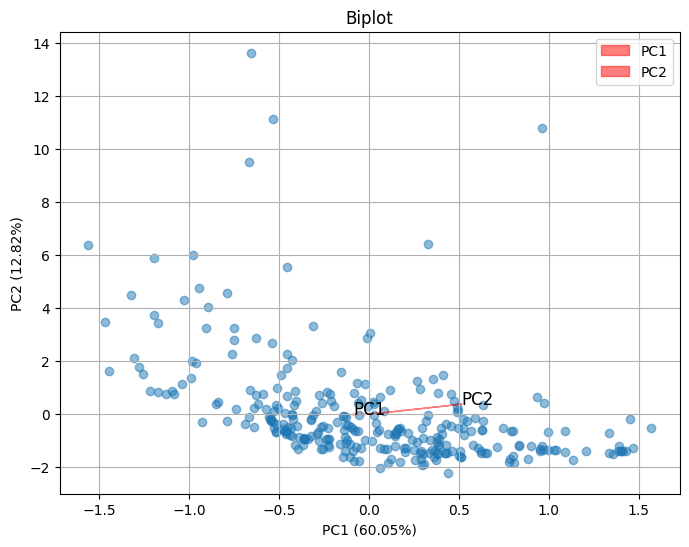

In [156]:
num_components_to_visualize = 2

# Create a biplot
def biplot(pca, data, num_components_to_visualize):
    components = pca.components_[:num_components_to_visualize]
    projected_data = pca.transform(data)[:,:num_components_to_visualize]
    
    # Scatterplot of the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)
    
    # Add vectors representing the principal components
    for i, (component, feature_name) in enumerate(zip(components,data.columns)):
        plt.arrow(0, 0, component[0], component[1], label=feature_name, color='r', alpha=0.5)
        plt.text(component[0], component[1], feature_name, fontsize=12)
    
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
    plt.title("Biplot")
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the biplot function to create the biplot
biplot(pca, df_pca, num_components_to_visualize)

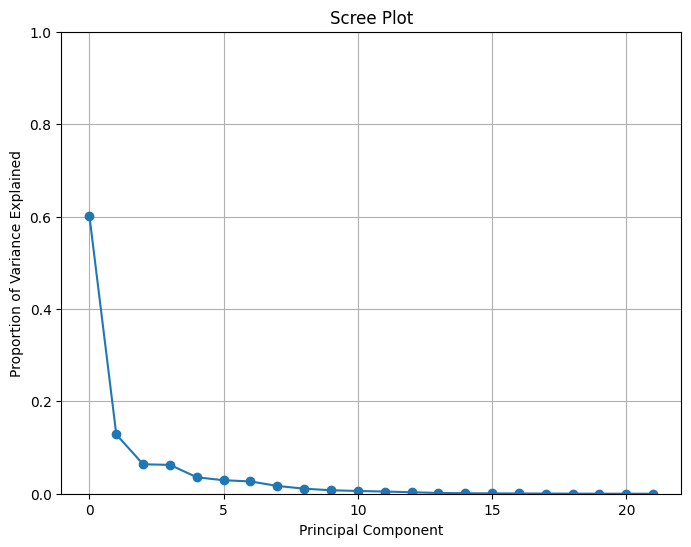

In [157]:
# Calculate the proportion of variance explained
propve = explained_variance / explained_variance.sum()

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(propve, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.ylim(0, 1)
plt.title("Scree Plot")
plt.grid(True)
plt.show()

In [158]:
# Calculate the cumulative proportion of variance explained
cumulative_propve = np.cumsum(propve)
cumulative_propve

array([0.60050355, 0.72872867, 0.79242682, 0.85490421, 0.89050612,
       0.91967769, 0.9462609 , 0.96313147, 0.97401666, 0.98153406,
       0.98747983, 0.99221117, 0.99542103, 0.99707063, 0.998082  ,
       0.99882766, 0.99938231, 0.99976418, 0.99995613, 0.99999998,
       1.        , 1.        ])

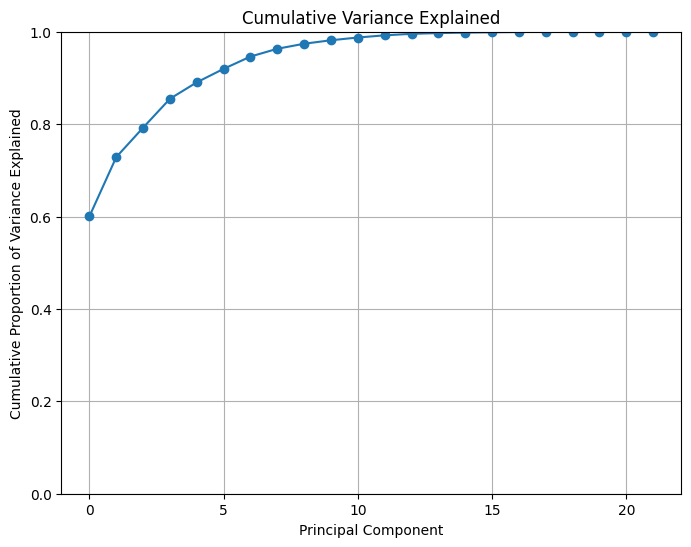

In [159]:
# Create a plot of the cumulative proportion of variance explained
plt.figure(figsize=(8, 6))
plt.plot(cumulative_propve, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.ylim(0, 1)
plt.title("Cumulative Variance Explained")
plt.grid(True)
plt.show()

In [160]:
# Define the threshold (e.g., 0.9)
threshold = 0.90

# Find the index where cumulative_propve first exceeds or is equal to the threshold
index = np.where(cumulative_propve >= threshold)[0][0]

print("Index where cumulative proportion of variance >= 0.9:", index)


Index where cumulative proportion of variance >= 0.9: 5


In [161]:
# Create a new DataFrame 'df2' with the 'status' column and the first six principal components
df2 = pd.DataFrame({
    'status': Y,  # Replace 'df' with the name of your original DataFrame
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'PC4': X_pca[:, 3],
    'PC5': X_pca[:, 4],
    'PC6': X_pca[:, 5],
    'PCA7': X_pca[:, 6]
})

df2.head()


status       PC1       PC2       PC3       PC4       PC5       PC6  \
0       1  3.351645 -1.758387  1.584905  0.413548  0.971238  0.814468   
1       1  6.228635 -1.511881  2.647263 -0.622299  1.187497  0.053816   
2       1  5.305883 -1.651190  2.232372  0.716290  1.189968 -0.055849   
3       1  5.600862 -1.798677  2.246566  0.128998  1.348006 -0.095426   
4       1  7.343757 -1.176047  2.840712  0.977649  0.798430  0.393495   

       PCA7  
0  0.103461  
1  0.392049  
2  0.168415  
3  0.238040  
4  0.239462

In [162]:
X= df2.drop('status',axis=1)
Y= df2['status']

In [163]:
X.head()

PC1       PC2       PC3       PC4       PC5       PC6      PCA7
0  3.351645 -1.758387  1.584905  0.413548  0.971238  0.814468  0.103461
1  6.228635 -1.511881  2.647263 -0.622299  1.187497  0.053816  0.392049
2  5.305883 -1.651190  2.232372  0.716290  1.189968 -0.055849  0.168415
3  5.600862 -1.798677  2.246566  0.128998  1.348006 -0.095426  0.238040
4  7.343757 -1.176047  2.840712  0.977649  0.798430  0.393495  0.239462

# Split Test and Train

In [164]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,random_state=42)
print("Shape of X_Train: ",np.shape(X_train)) 
print("Shape of Y_Train: ",np.shape(Y_train))
print("Shape of X_Test: ",np.shape(X_test))
print("Shape of Y_Test: ",np.shape(Y_test))


Shape of X_Train:  (235, 7)
Shape of Y_Train:  (235,)
Shape of X_Test:  (59, 7)
Shape of Y_Test:  (59,)


In [165]:
# select random input data from X

input_data =X.sample(n=4,random_state=2)

# select output from Y
output_data = Y.sample(n=4,random_state=2)


In [166]:
input_data

PC1       PC2       PC3       PC4       PC5       PC6      PCA7
128 -2.256093 -0.956752 -0.652615  1.080035 -0.423248  0.291802 -0.962532
206 -1.213822  1.368709 -0.198625  0.104214 -0.308812  1.317342 -0.351175
219 -0.092440  1.118392 -1.241210 -0.024089 -0.064741  0.841987 -0.272677
7   -1.598770 -2.471398 -0.174353  0.236727 -0.920325 -0.398643  0.269839

In [167]:
output_data

128    1
206    0
219    0
7      1
Name: status, dtype: int64

In [168]:
def Model_Evaluation(Y_true,Y_pred):
    CM= confusion_matrix(Y_true,Y_pred)
    TN=CM[0][0]
    FN=CM[1][0]
    TP=CM[1][1]
    FP=CM[0][1]

    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_score=2*(Recall * Precision) / (Recall + Precision)
    print("True Positive", TP)
    print("False Positive", FP)
    print("True Negative", TN)
    print("False Negative", FN)
    print("Accuracy: ",Accuracy)
    print("Precision: ",Precision)
    print("Recall: ",Recall)
    print("F1_score: ",F1_score)
    print("confusion matrix\n",CM)


def save_model(model, filename):
    filename="PCA_Oversampling/"+filename
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

def load_model(filename):
    filename="PCA_Oversampling/"+filename
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [169]:
# save Standard Scalar and Pca models
save_model(scalar,'PCA_Standard_scalar.pkl')
save_model(pca,'PCA_Model.pkl')

In [170]:
Y_train.value_counts()

1    118
0    117
Name: status, dtype: int64

In [171]:
Y_test.value_counts()

0    30
1    29
Name: status, dtype: int64

# Logistic Regression Model

Logistic regression is a statistical model used for binary classification and sometimes for multiclass classification problems.

Model Training

In [172]:
logistic_model = LogisticRegression(random_state=4)
logistic_model

LogisticRegression(random_state=4)

In [173]:
logistic_model.fit(X_train,Y_train)

LogisticRegression(random_state=4)

Model evaluation for Training Dataset

In [174]:
Y_pred= logistic_model.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logistic_model.score(X_train, Y_train)))

Accuracy of logistic regression classifier on train set: 0.83


In [175]:
# Generate a classification report
classification_rep = classification_report(Y_train, Y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       117
           1       0.83      0.81      0.82       118

    accuracy                           0.83       235
   macro avg       0.83      0.83      0.83       235
weighted avg       0.83      0.83      0.83       235



We can see bias in the classification report

In [176]:
Model_Evaluation(Y_train,Y_pred)

True Positive 96
False Positive 19
True Negative 98
False Negative 22
Accuracy:  0.825531914893617
Precision:  0.8347826086956521
Recall:  0.8135593220338984
F1_score:  0.8240343347639484
confusion matrix
 [[98 19]
 [22 96]]


Model Evaluation for Test data

In [177]:
Y_pred_test=logistic_model.predict(X_test)
Model_Evaluation(Y_test,Y_pred_test)

True Positive 25
False Positive 5
True Negative 25
False Negative 4
Accuracy:  0.847457627118644
Precision:  0.8333333333333334
Recall:  0.8620689655172413
F1_score:  0.847457627118644
confusion matrix
 [[25  5]
 [ 4 25]]


Save the model

In [178]:
save_model(logistic_model,"PCALogisticRegressionModel.pkl")

Building a predictive system

In [179]:
# load model
LogisticRegressionModel= load_model("PCALogisticRegressionModel.pkl")

In [180]:
input_data

PC1       PC2       PC3       PC4       PC5       PC6      PCA7
128 -2.256093 -0.956752 -0.652615  1.080035 -0.423248  0.291802 -0.962532
206 -1.213822  1.368709 -0.198625  0.104214 -0.308812  1.317342 -0.351175
219 -0.092440  1.118392 -1.241210 -0.024089 -0.064741  0.841987 -0.272677
7   -1.598770 -2.471398 -0.174353  0.236727 -0.920325 -0.398643  0.269839

In [181]:
# change input_data to numpy array
inp_data= np.asarray(input_data)

# reshape
inp_data_reshape= inp_data.reshape(4,-4)


In [182]:
pred = LogisticRegressionModel.predict(inp_data_reshape)

c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [183]:
pred

array([0, 0, 0, 0], dtype=int64)

In [184]:
output_data

128    1
206    0
219    0
7      1
Name: status, dtype: int64

# Decision Tree Model

Model training

In [185]:
dt_model= DecisionTreeClassifier(random_state=0,max_depth=5,criterion='entropy')

In [186]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

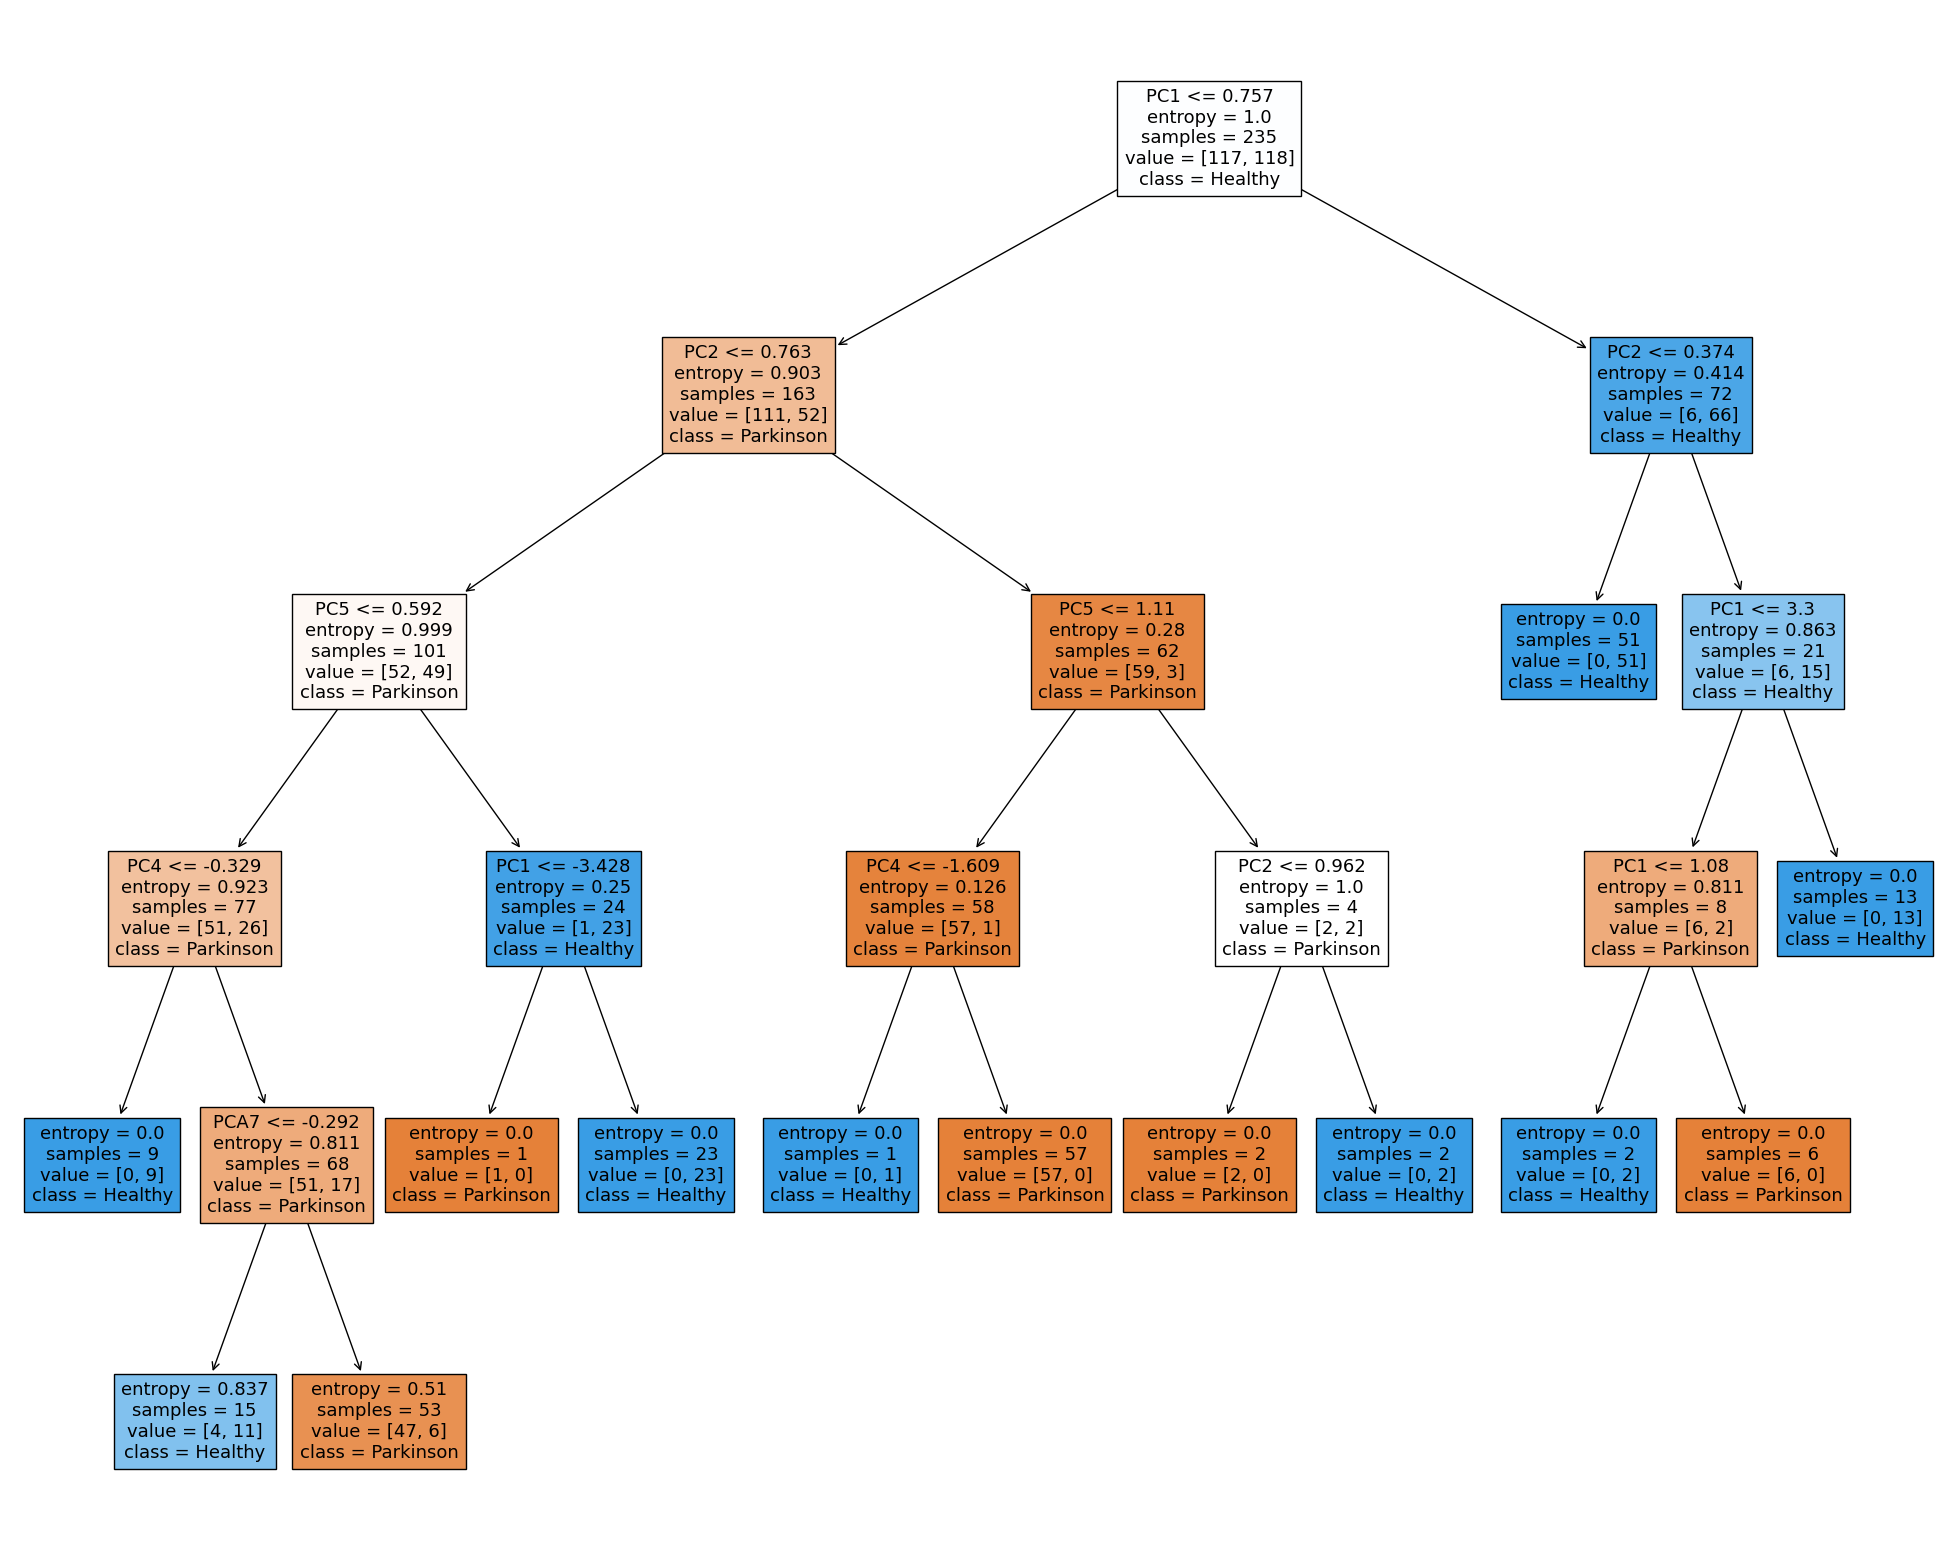

In [187]:
from sklearn import tree

# feature_names=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
#        'MDVP:Shimmer', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2']
feature_names=X.columns
target_names=['Parkinson', 'Healthy']

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dt_model, 
                     feature_names=feature_names,
                        class_names=target_names,
                   filled=True)
plt.show()



In [188]:
# importance of features
dt_model.feature_importances_


array([0.41999543, 0.2284241 , 0.        , 0.11849334, 0.1532021 ,
       0.        , 0.07988503])

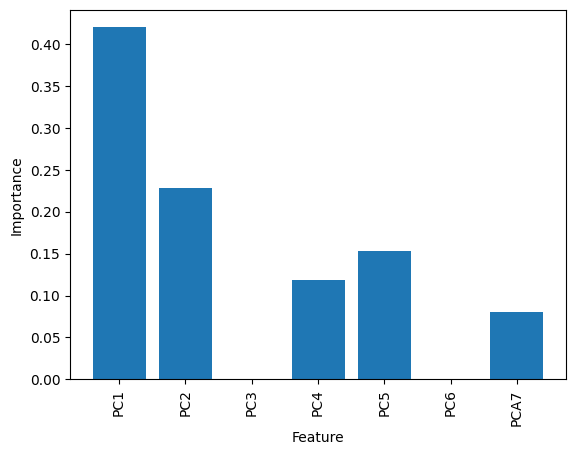

In [189]:
# get the feature importances
importances = dt_model.feature_importances_

# create a bar chart of the feature importances
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

Model Evaluation

In [190]:
# for train data
Y_pred= dt_model.predict(X_train)
# test data
Y_pred_test= dt_model.predict(X_test)


In [191]:
Model_Evaluation(Y_train,Y_pred) # for train

True Positive 112
False Positive 4
True Negative 113
False Negative 6
Accuracy:  0.9574468085106383
Precision:  0.9655172413793104
Recall:  0.9491525423728814
F1_score:  0.9572649572649573
confusion matrix
 [[113   4]
 [  6 112]]


In [192]:
Model_Evaluation(Y_test,Y_pred_test)

True Positive 27
False Positive 0
True Negative 30
False Negative 2
Accuracy:  0.9661016949152542
Precision:  1.0
Recall:  0.9310344827586207
F1_score:  0.9642857142857143
confusion matrix
 [[30  0]
 [ 2 27]]


Save the model

In [193]:
save_model(dt_model,"PCADecisionTreeClassifierModel.pkl")

Build a predictive system

In [194]:
# load model
DTModel= load_model("PCADecisionTreeClassifierModel.pkl")

In [195]:
# change input_data to numpy array
inp_data= np.asarray(input_data)

# reshape
inp_data_reshape= inp_data.reshape(4,-4)
pred = DTModel.predict(inp_data_reshape)

c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [196]:
pred

array([1, 0, 0, 0], dtype=int64)

In [197]:
output_data

128    1
206    0
219    0
7      1
Name: status, dtype: int64

# Random Forest Model

Model Training

In [198]:
rf_model= RandomForestClassifier(random_state=2,max_depth=4,criterion='entropy')

In [199]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=2)

In [200]:
len(rf_model)

100

plot the tree

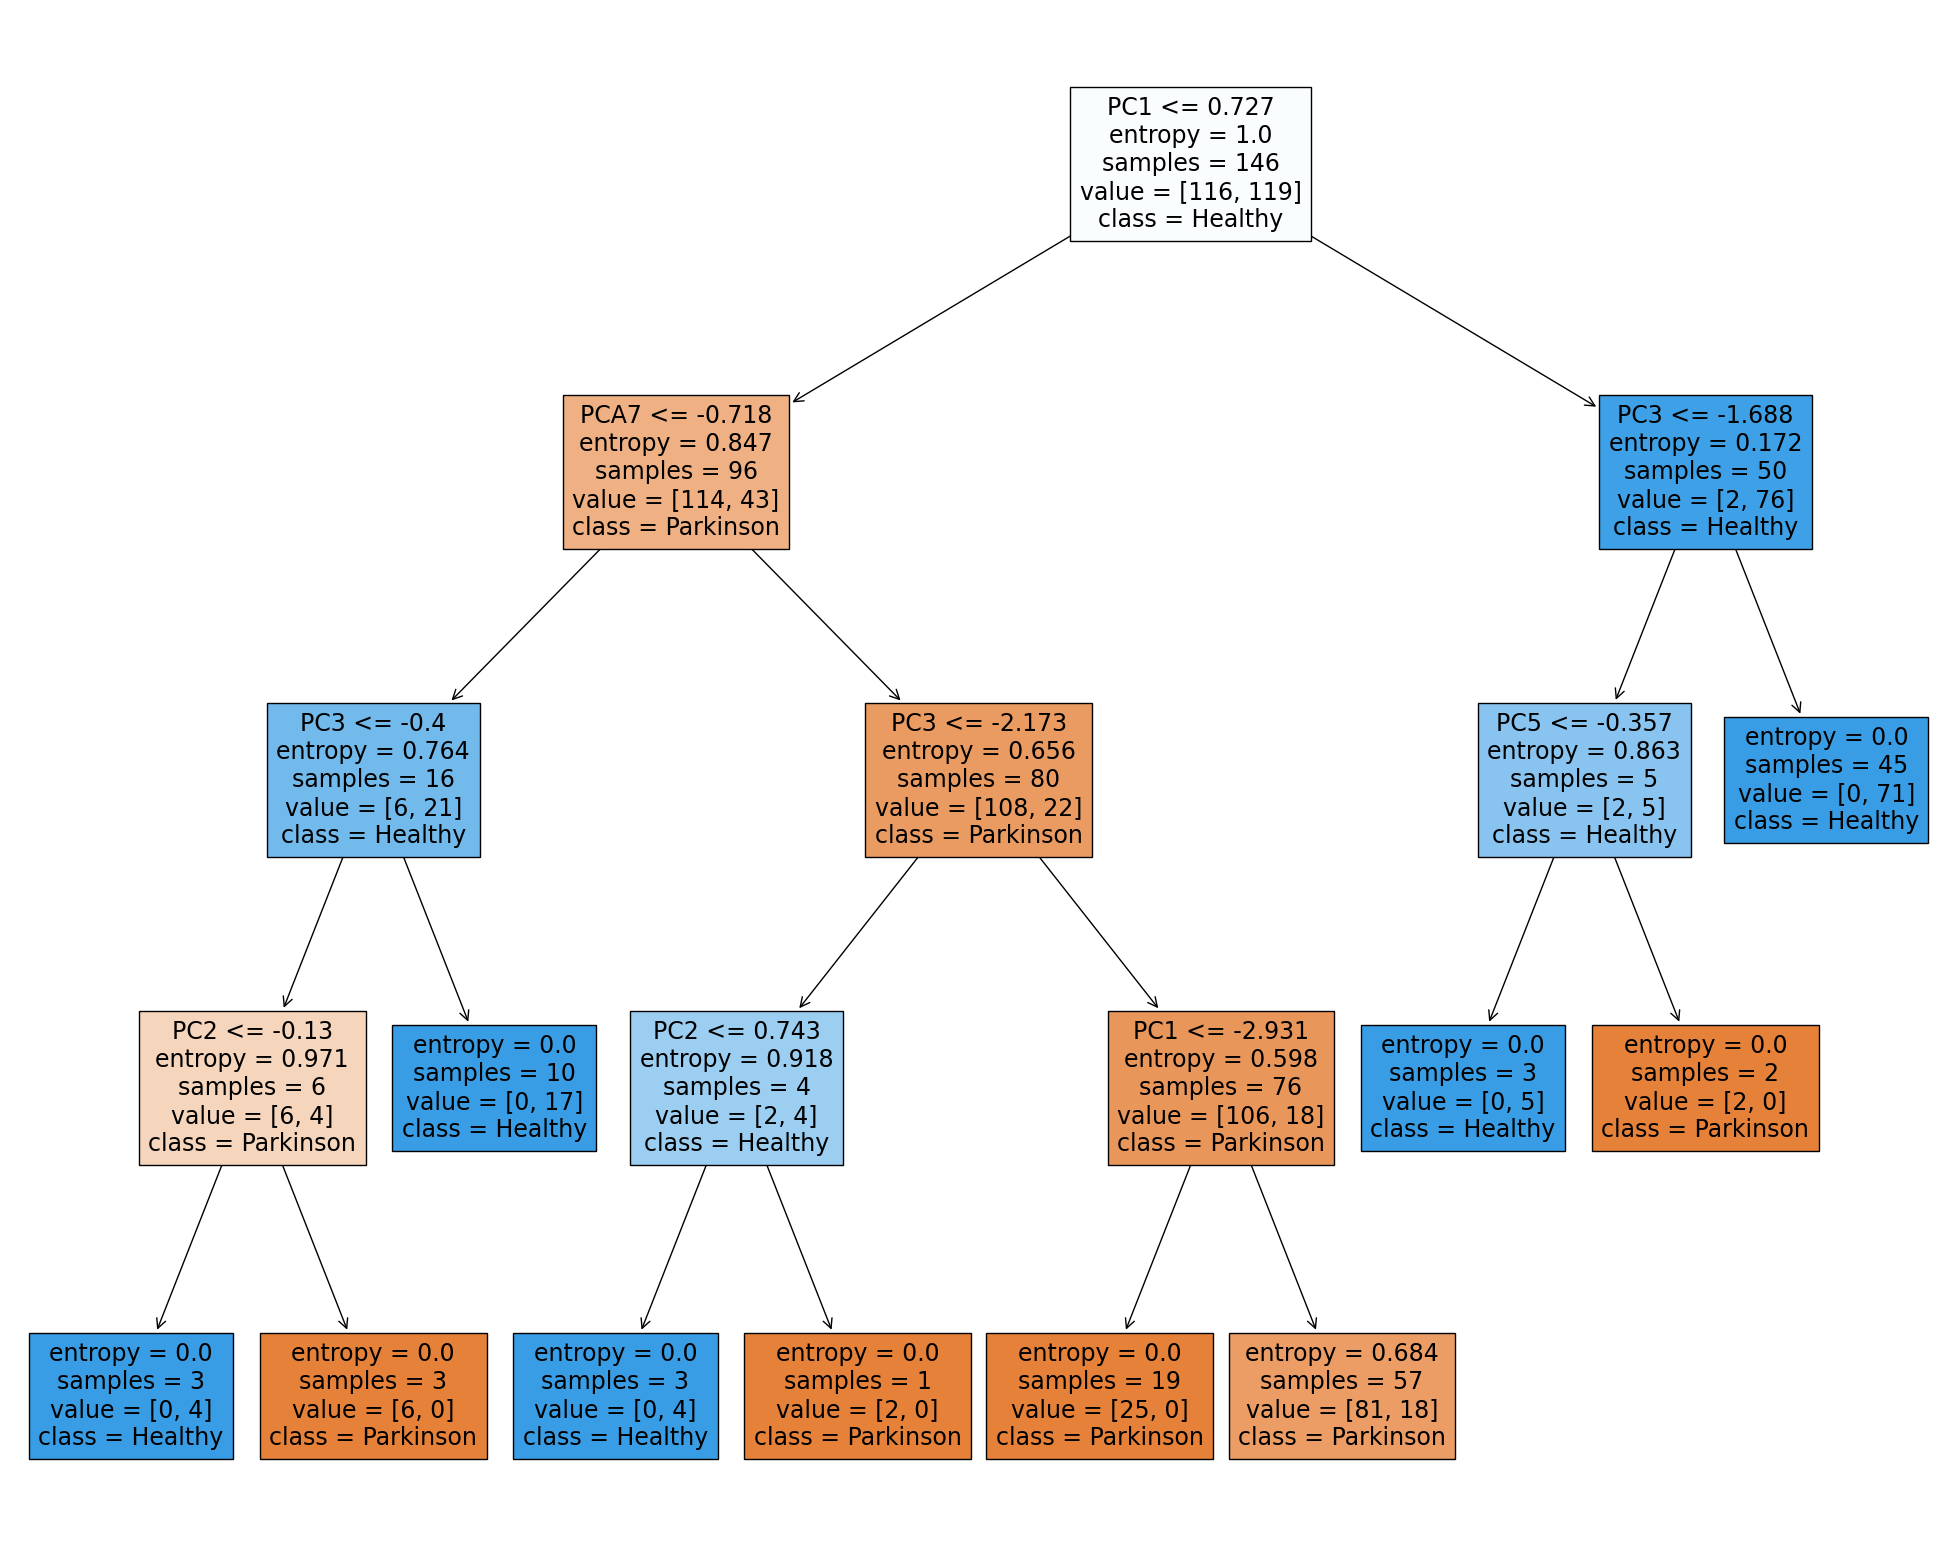

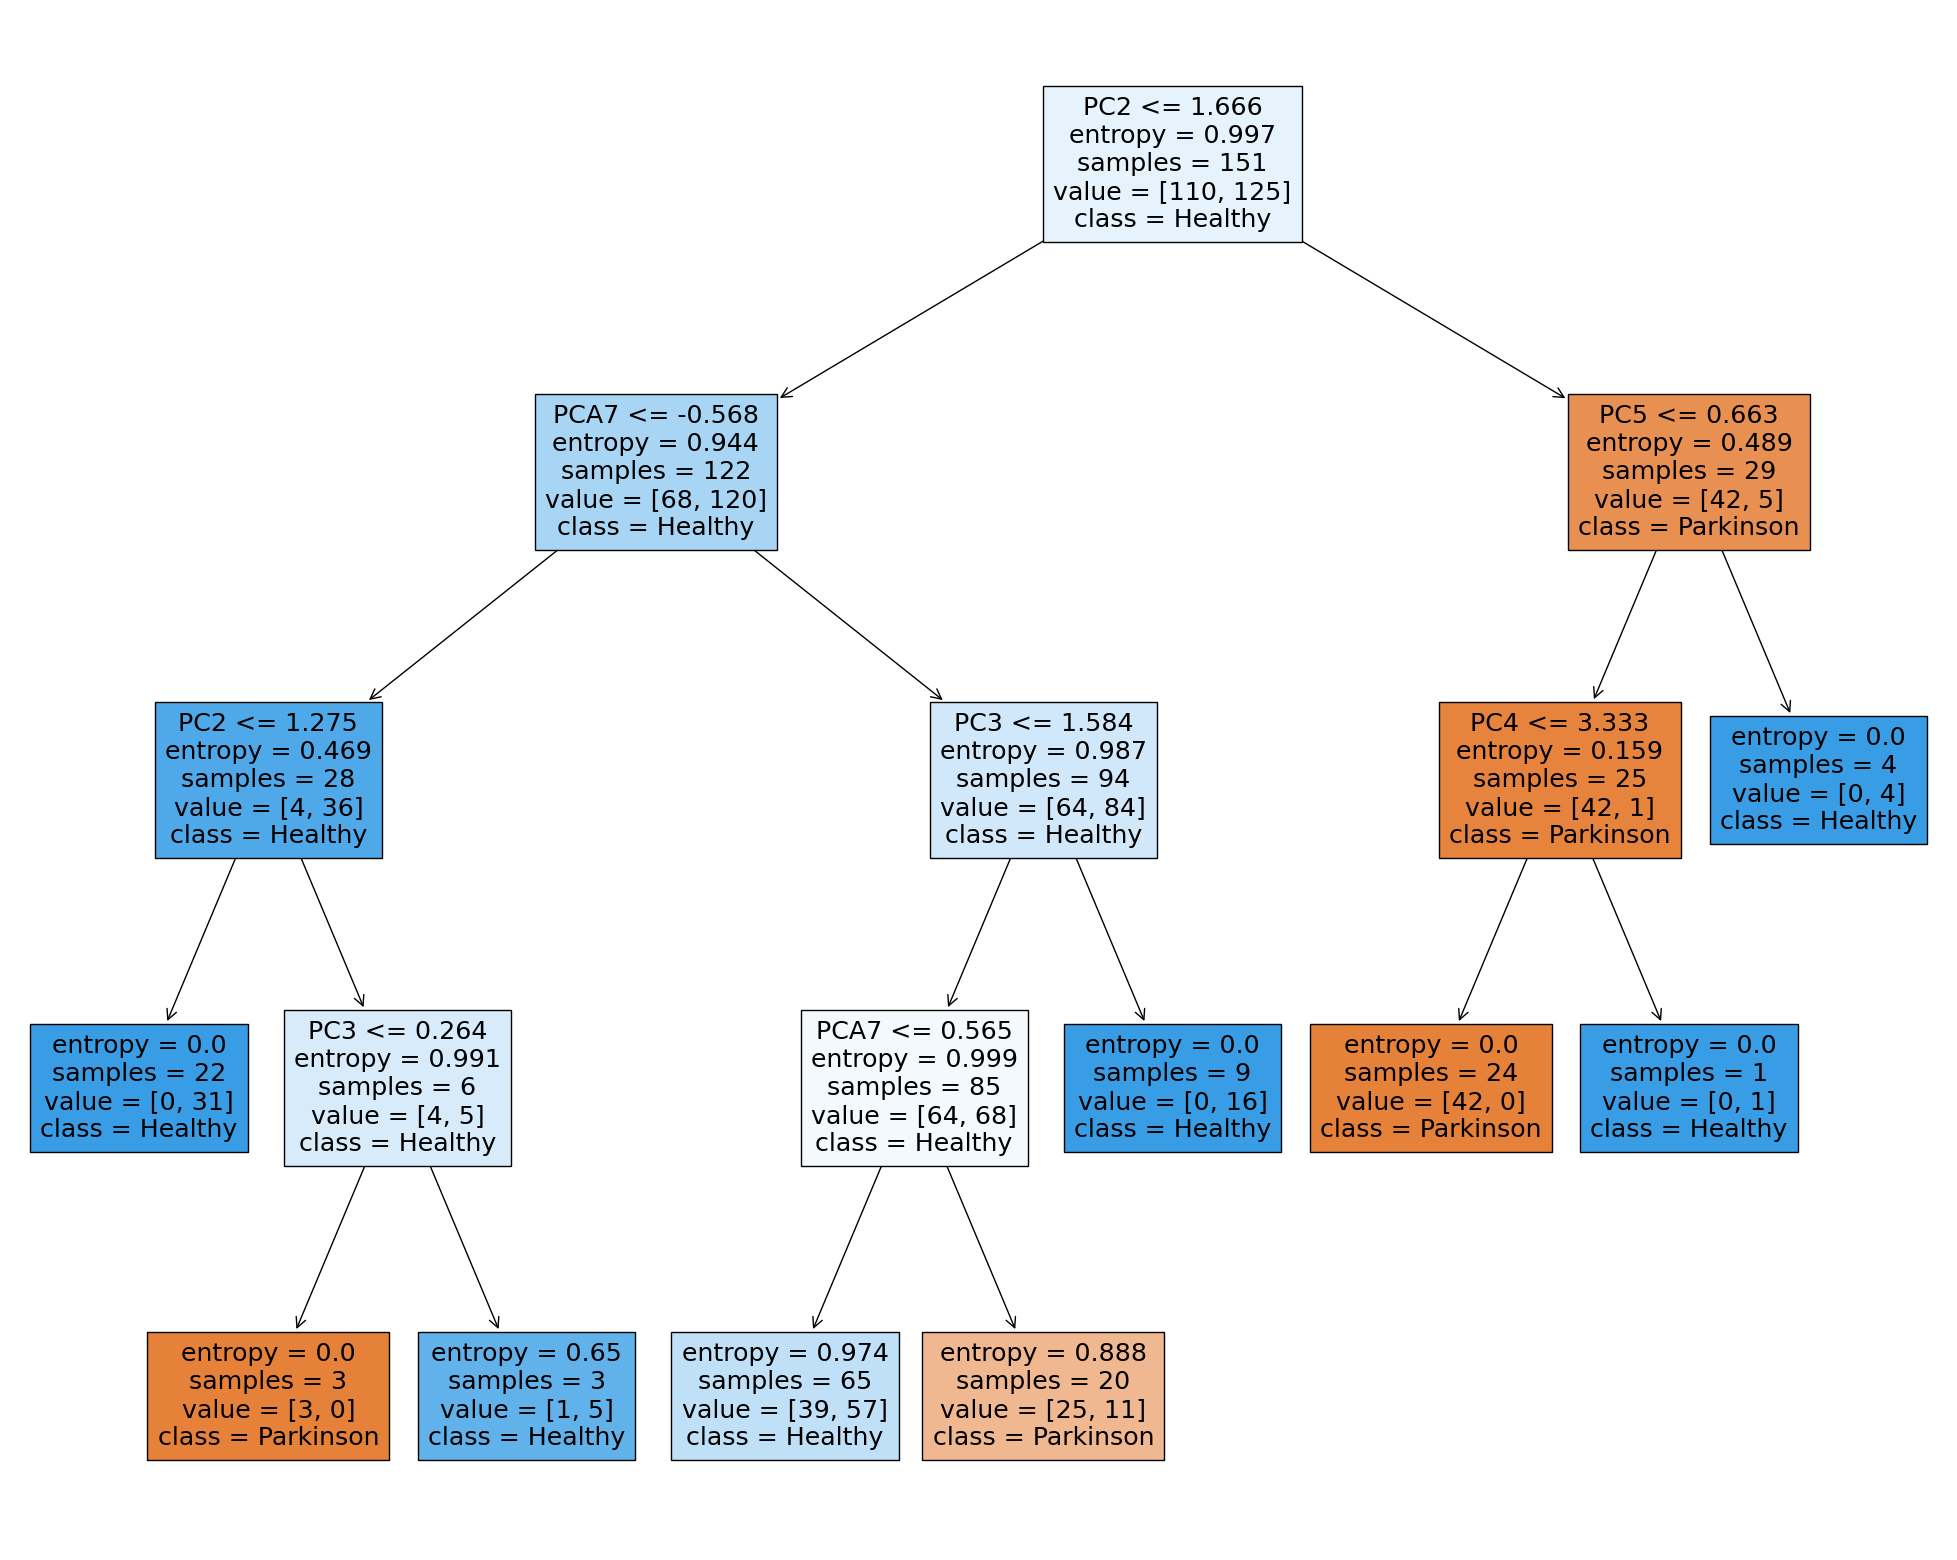

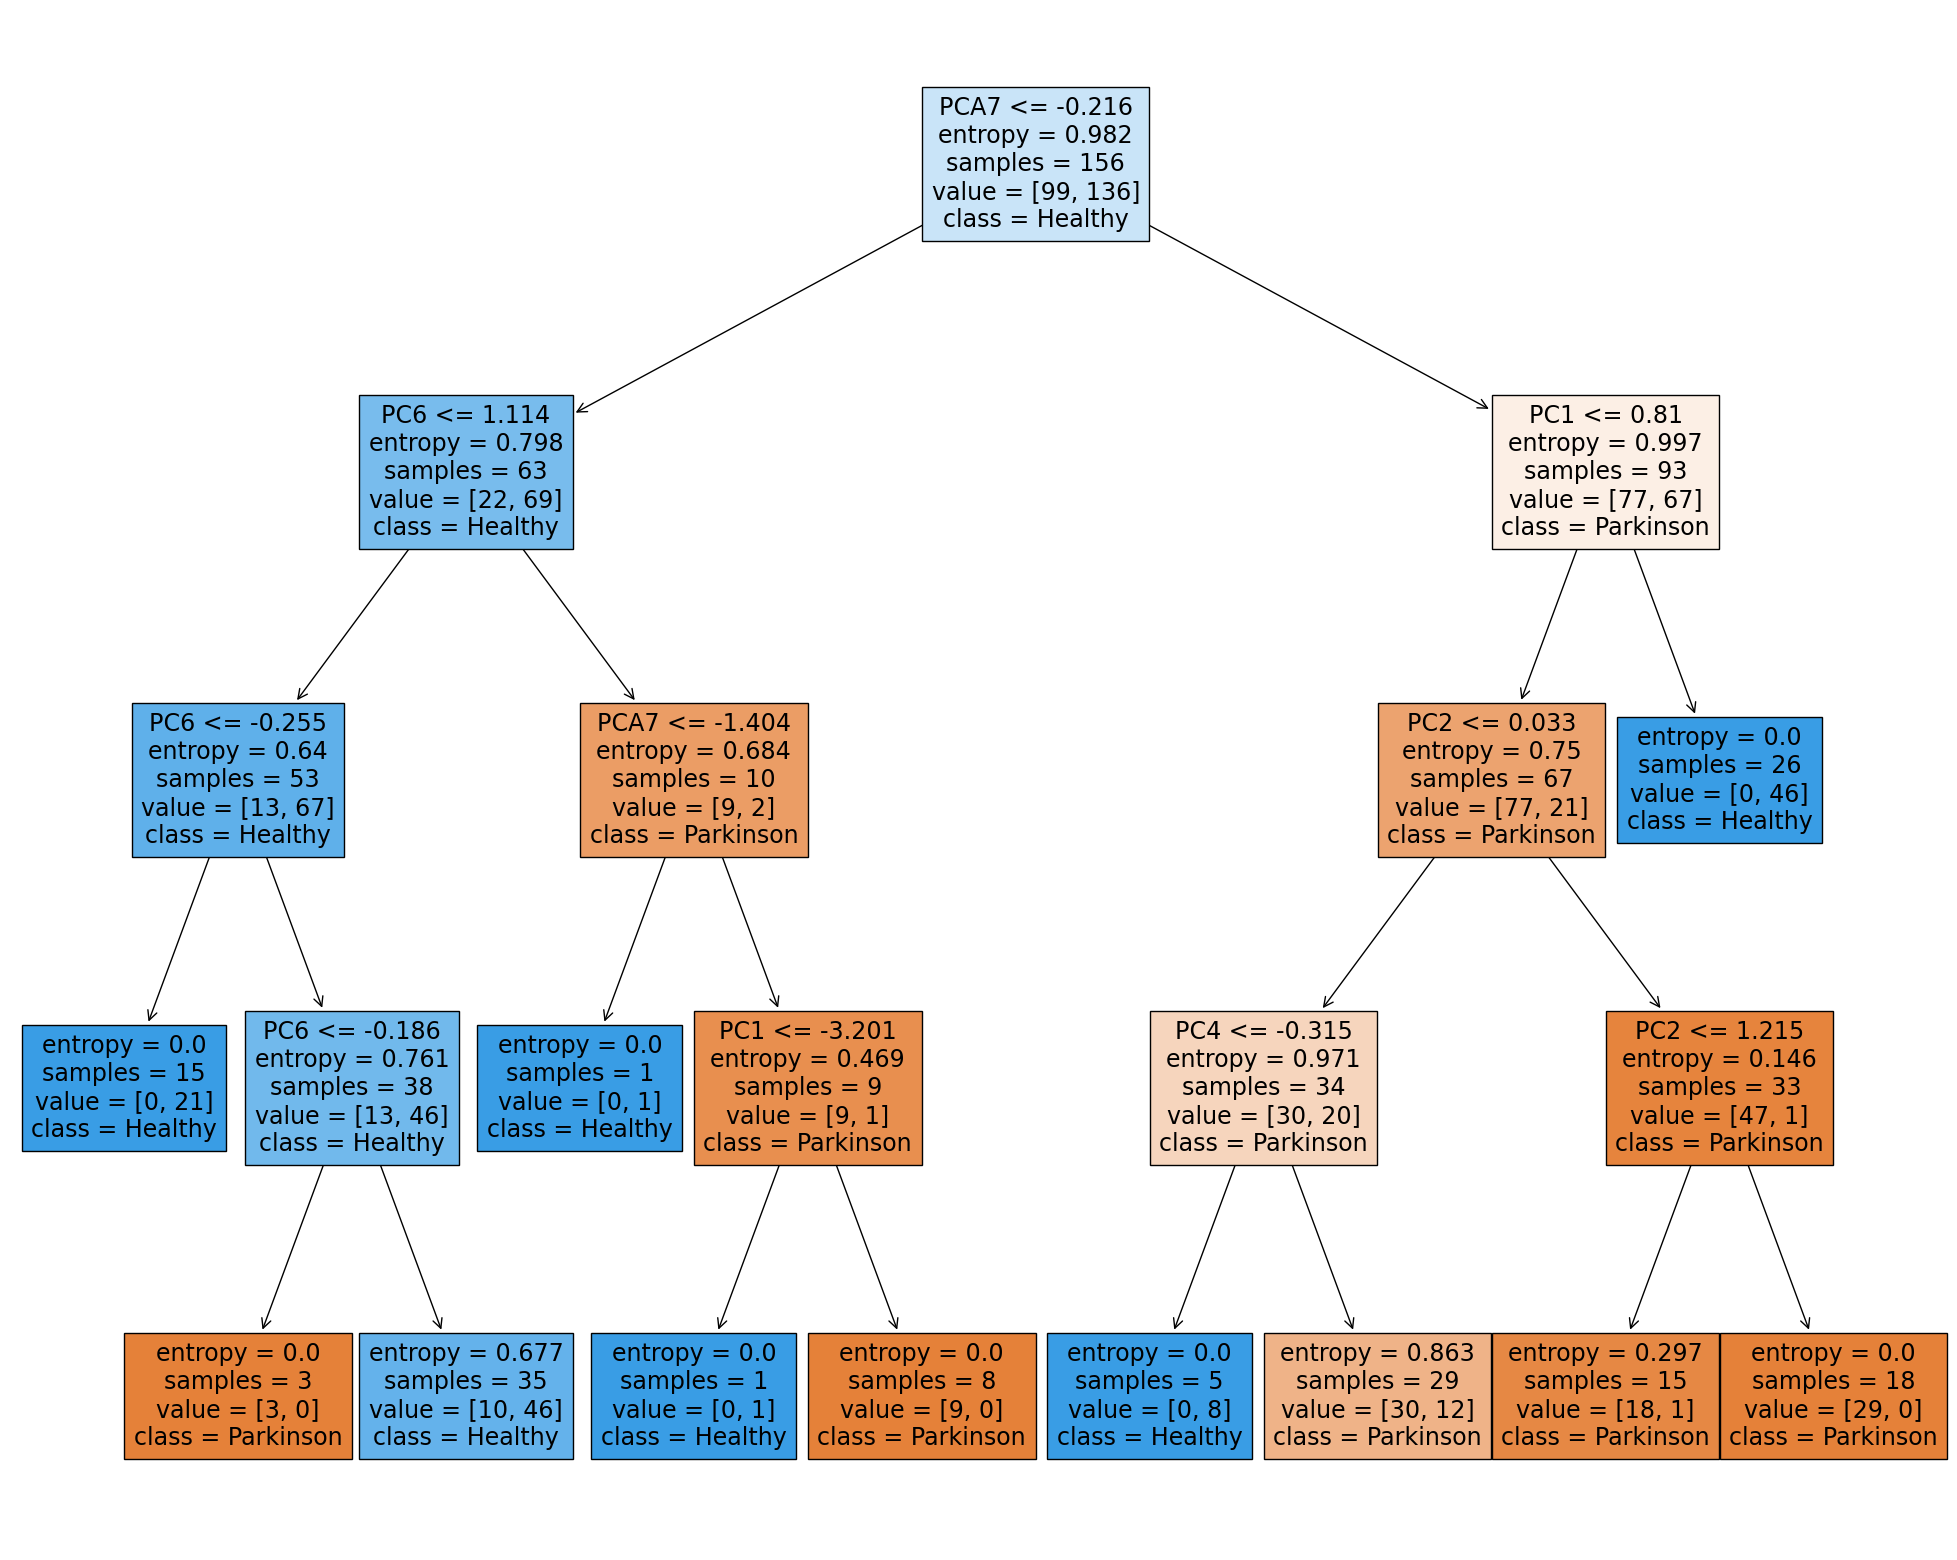

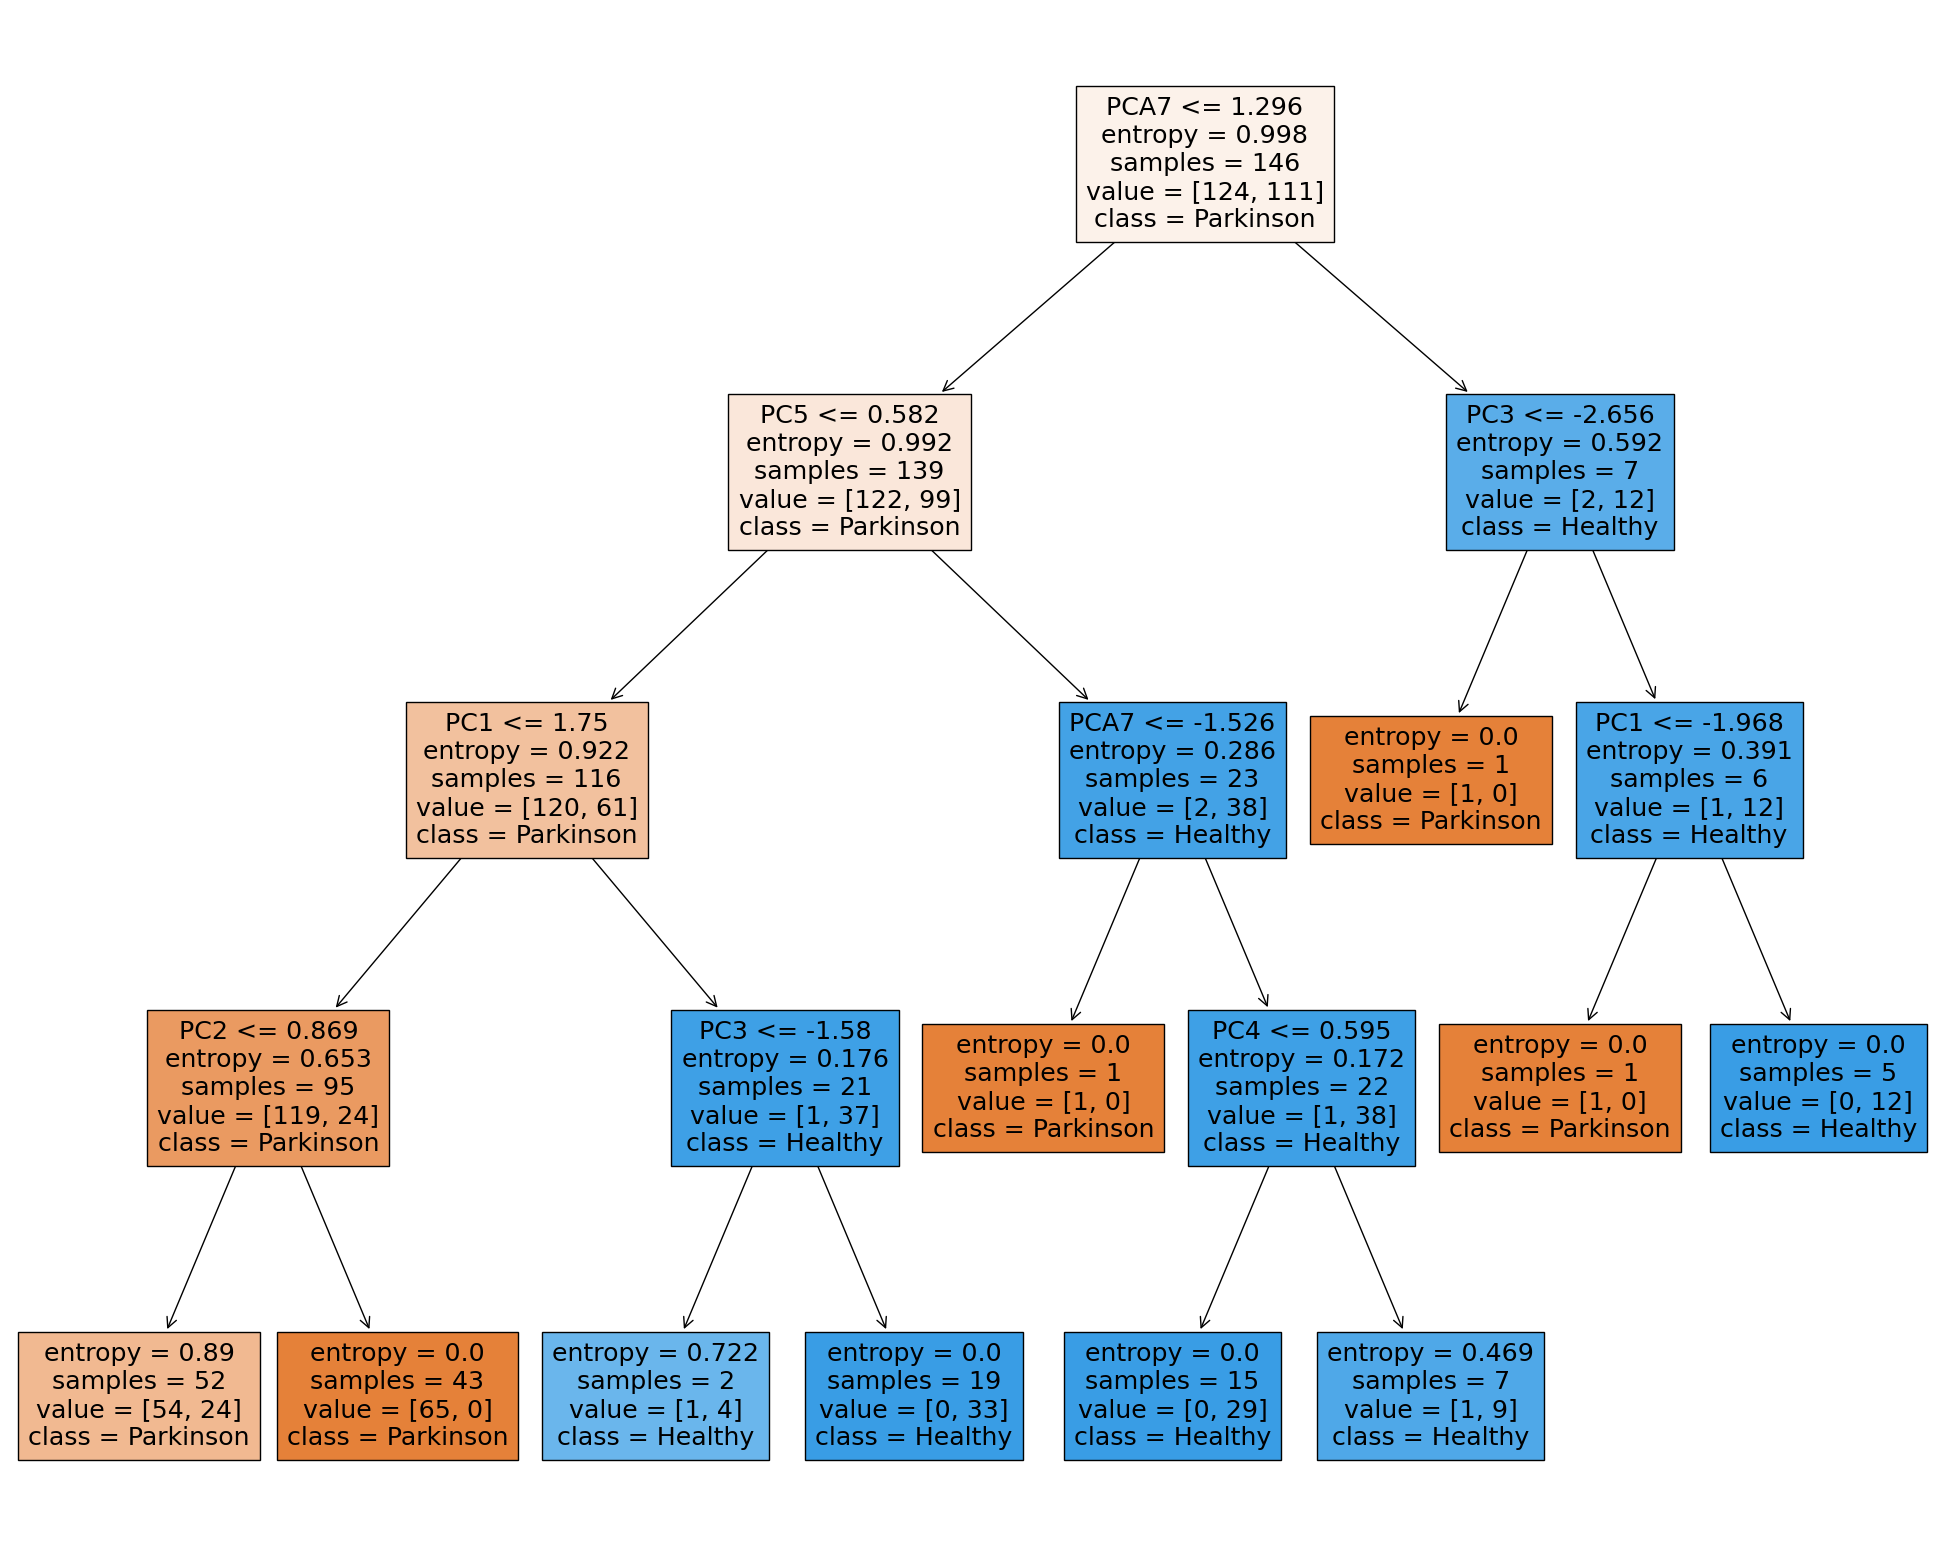

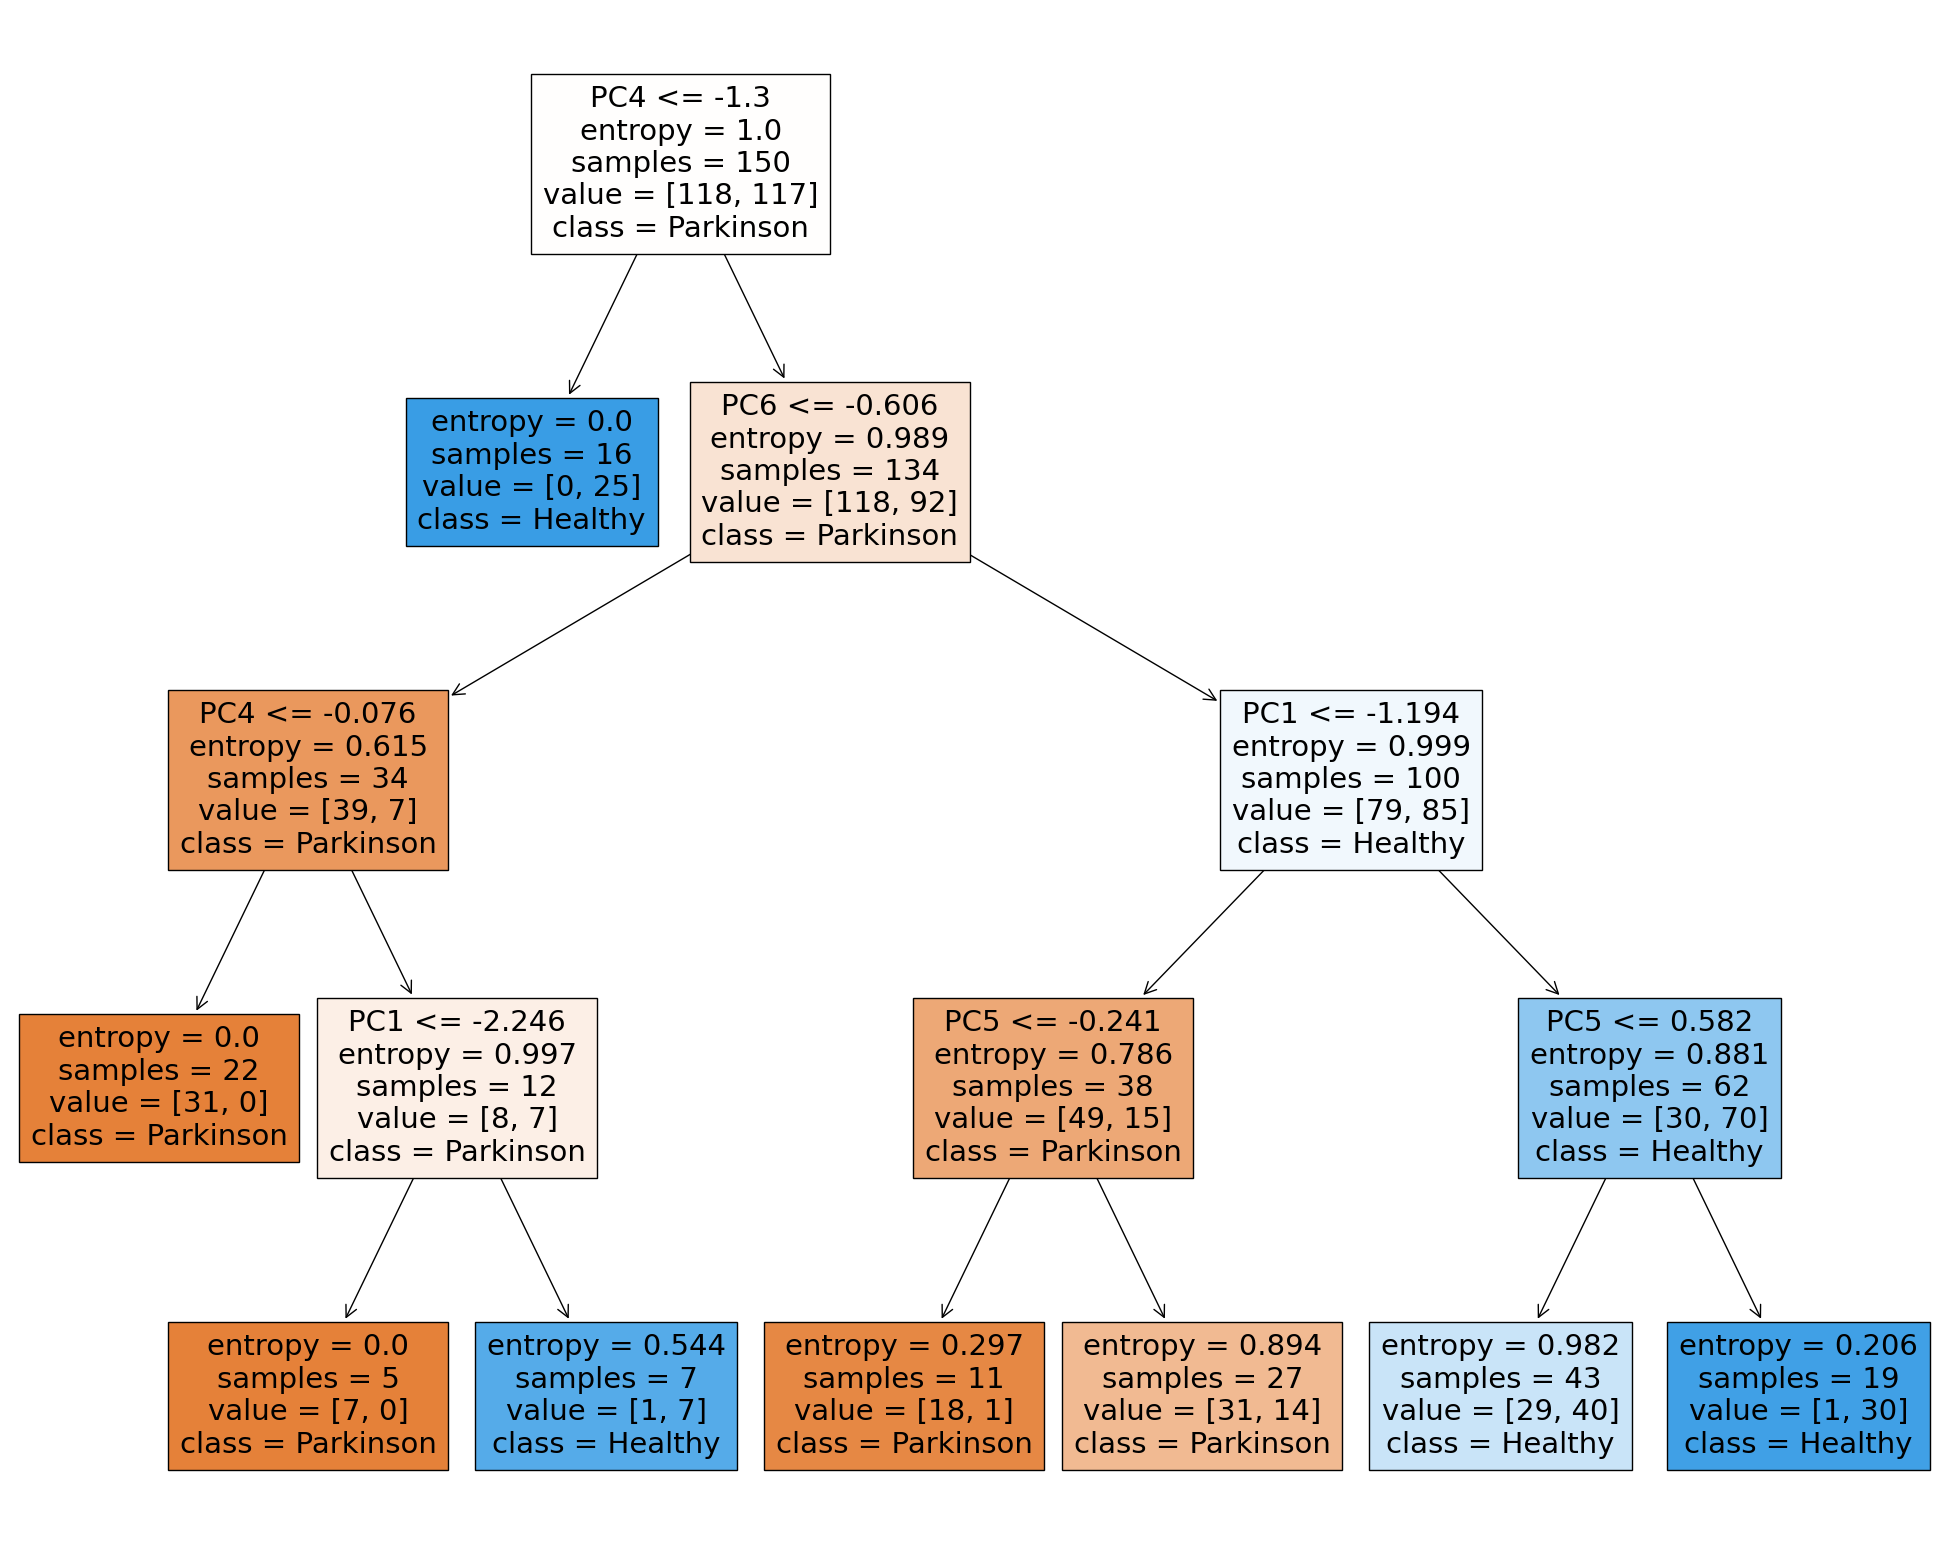

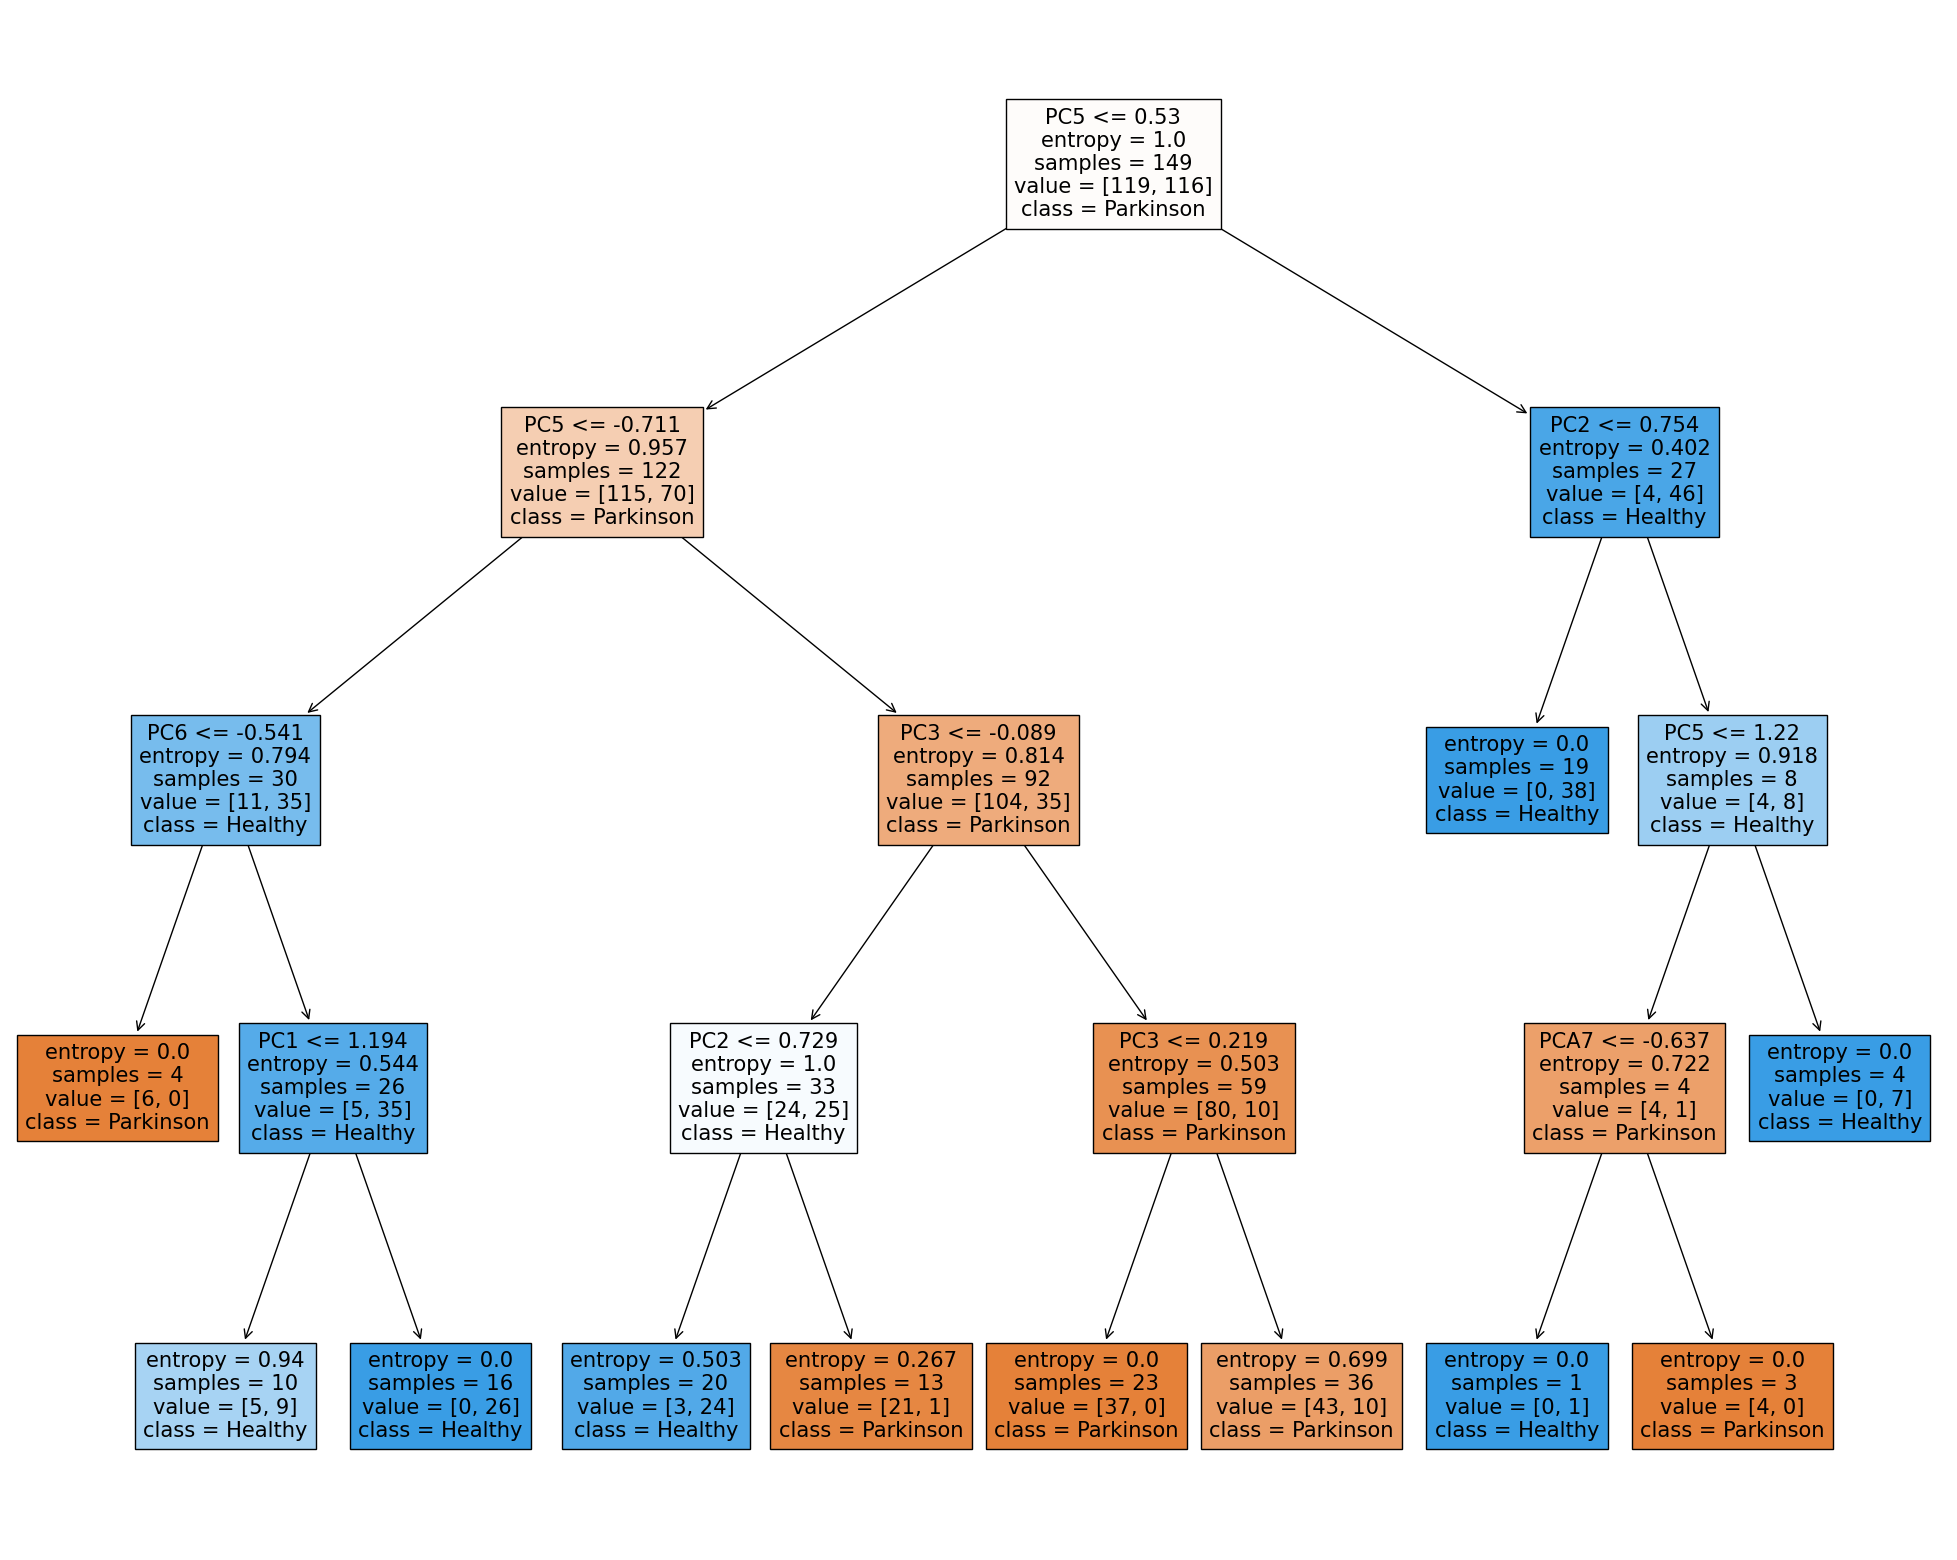

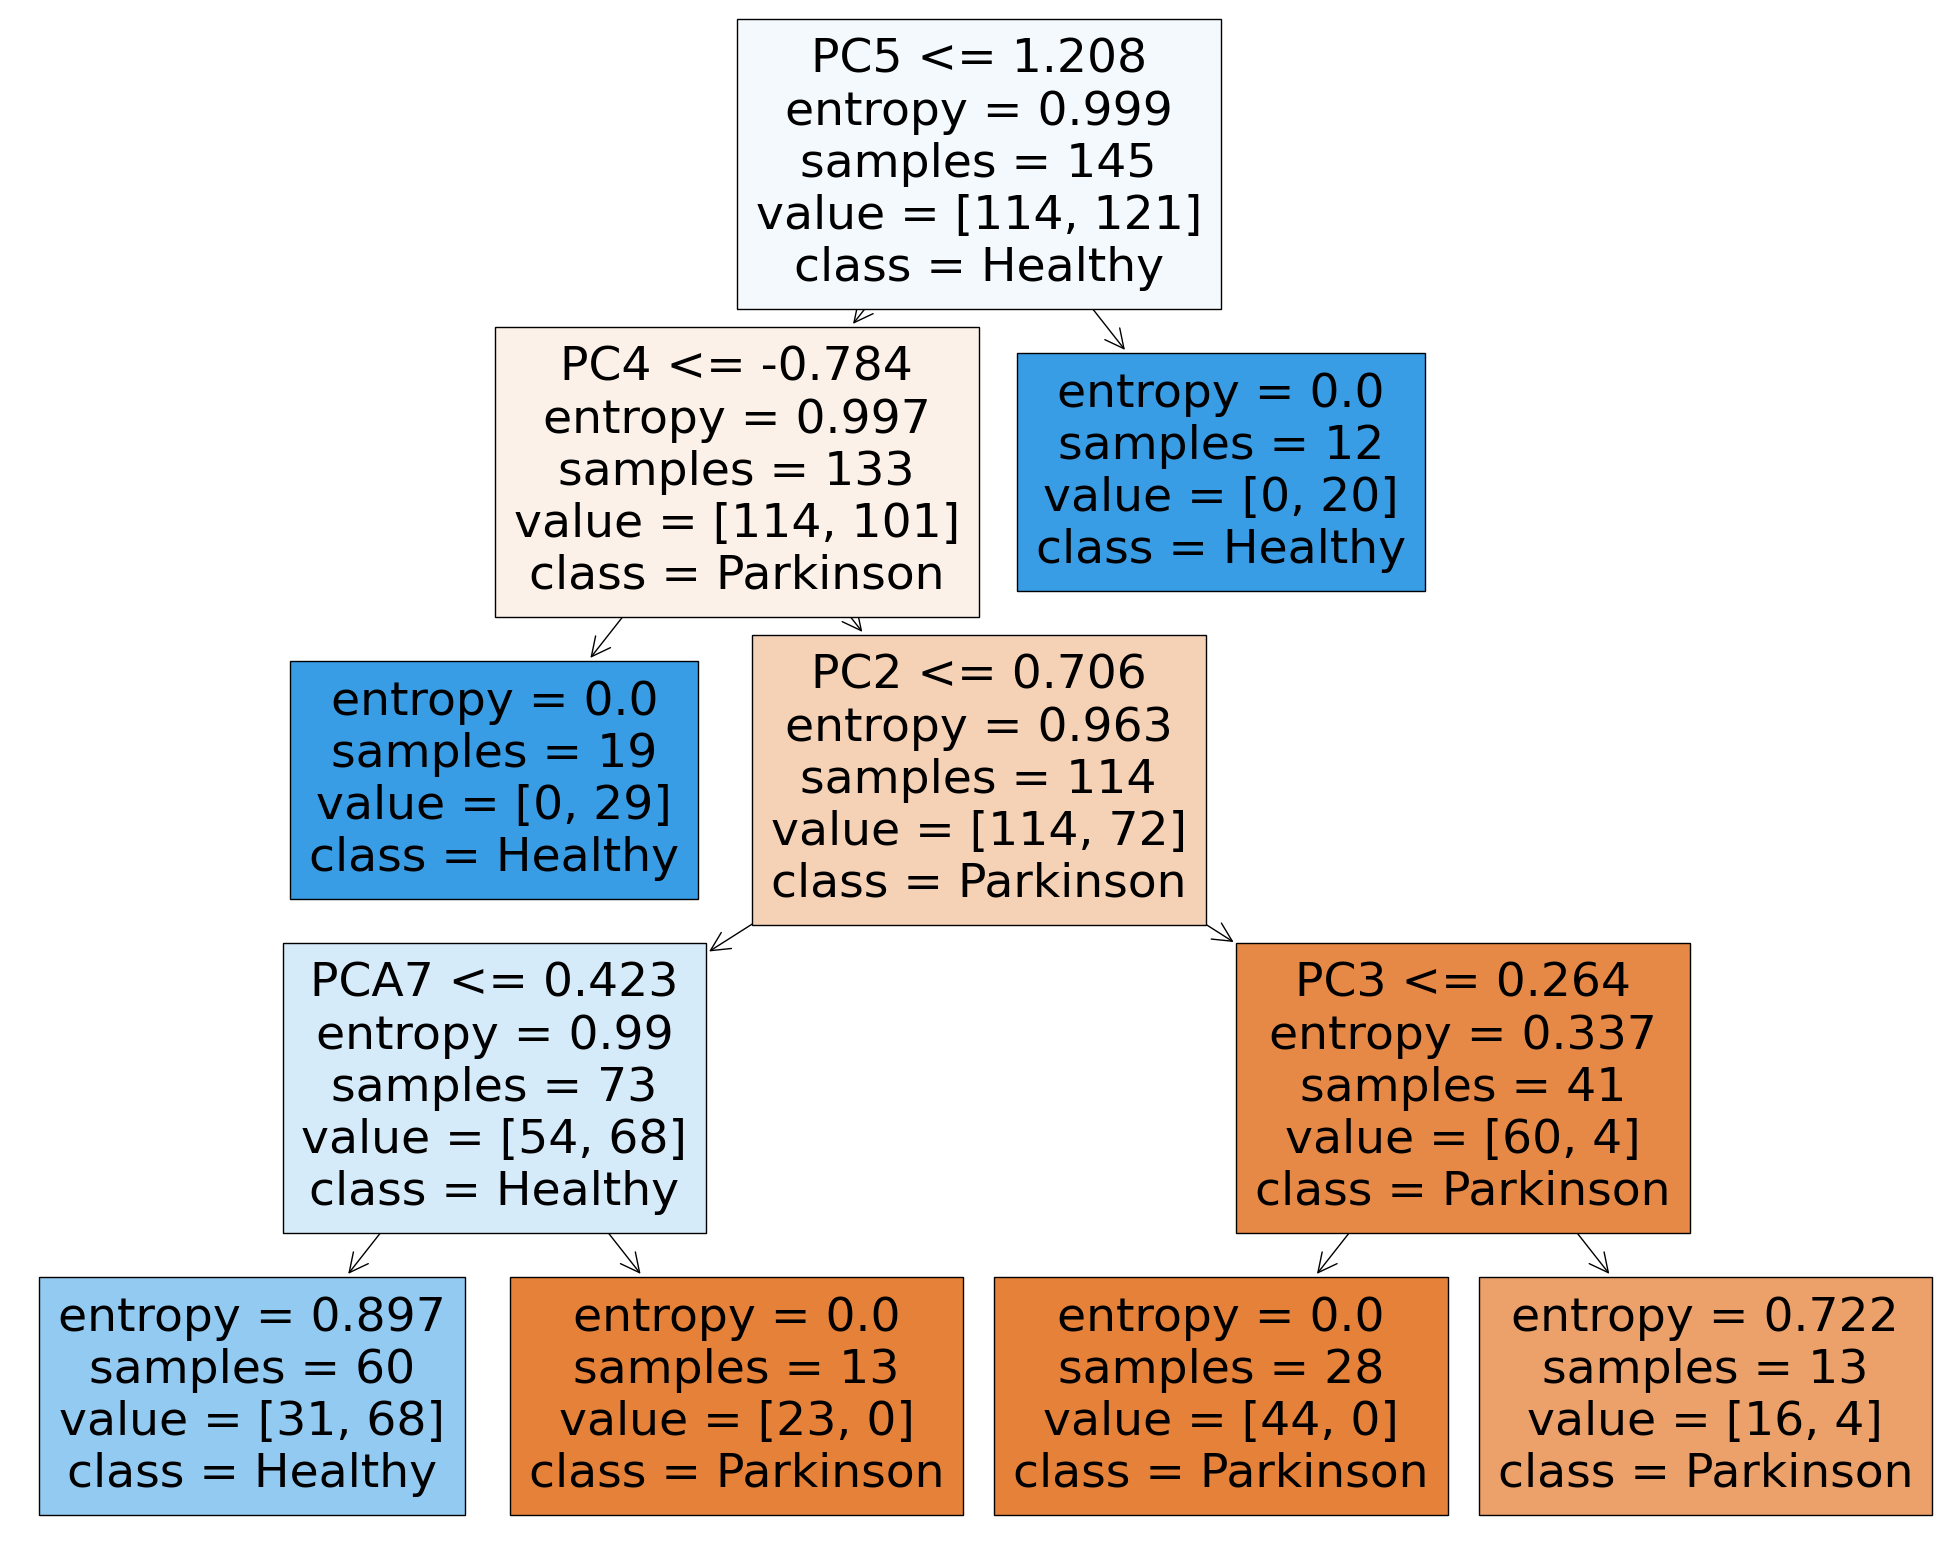

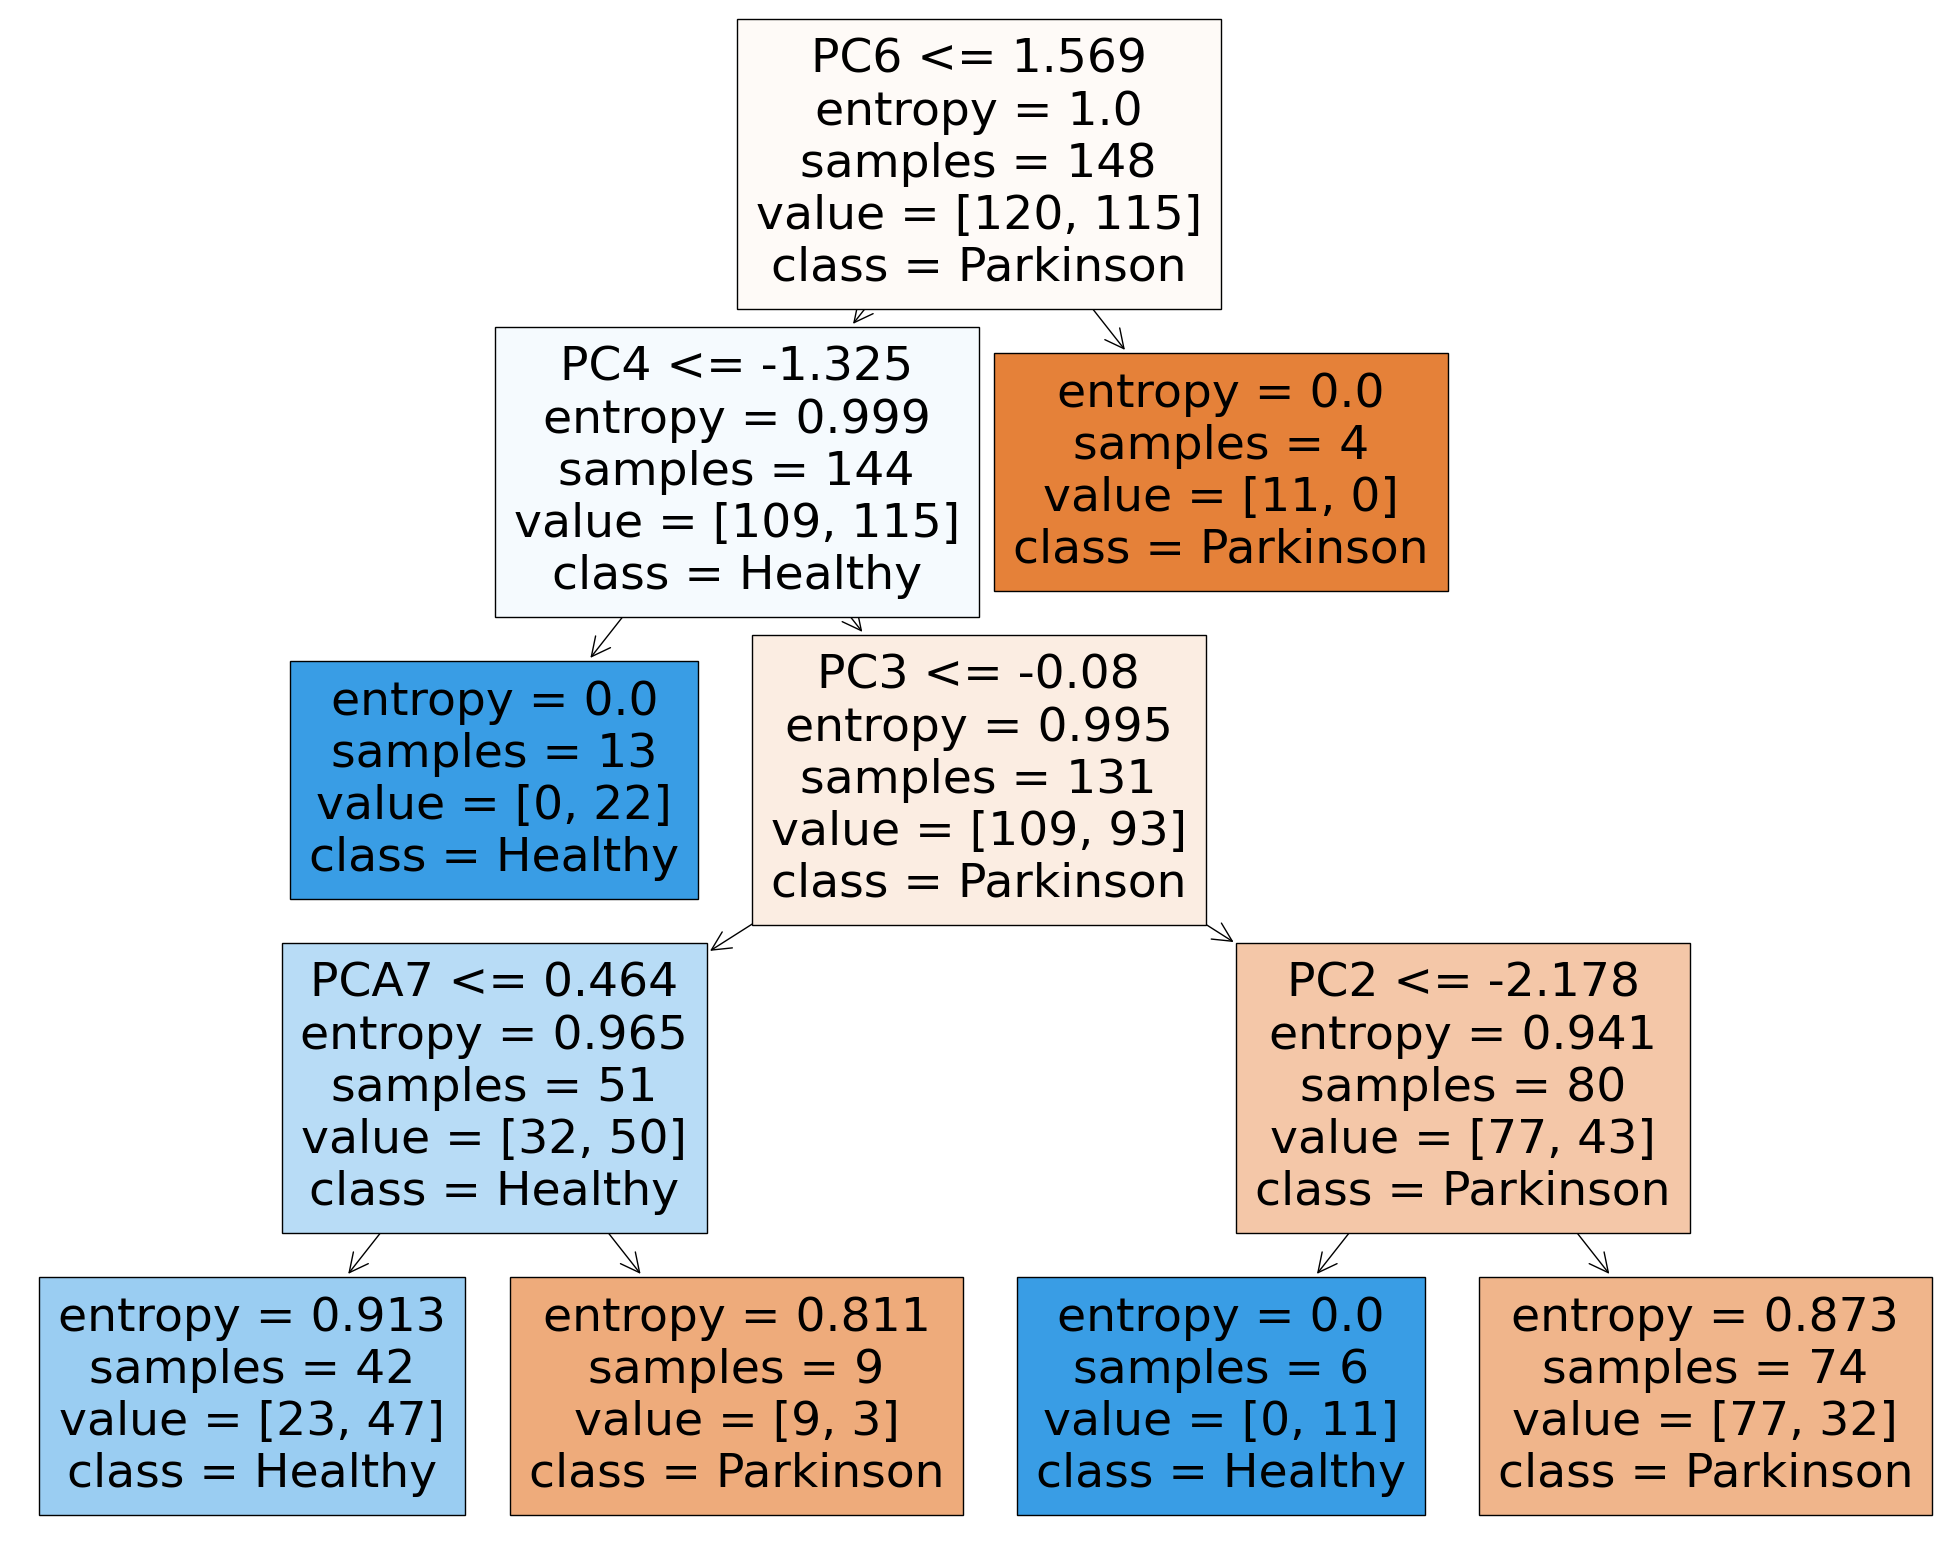

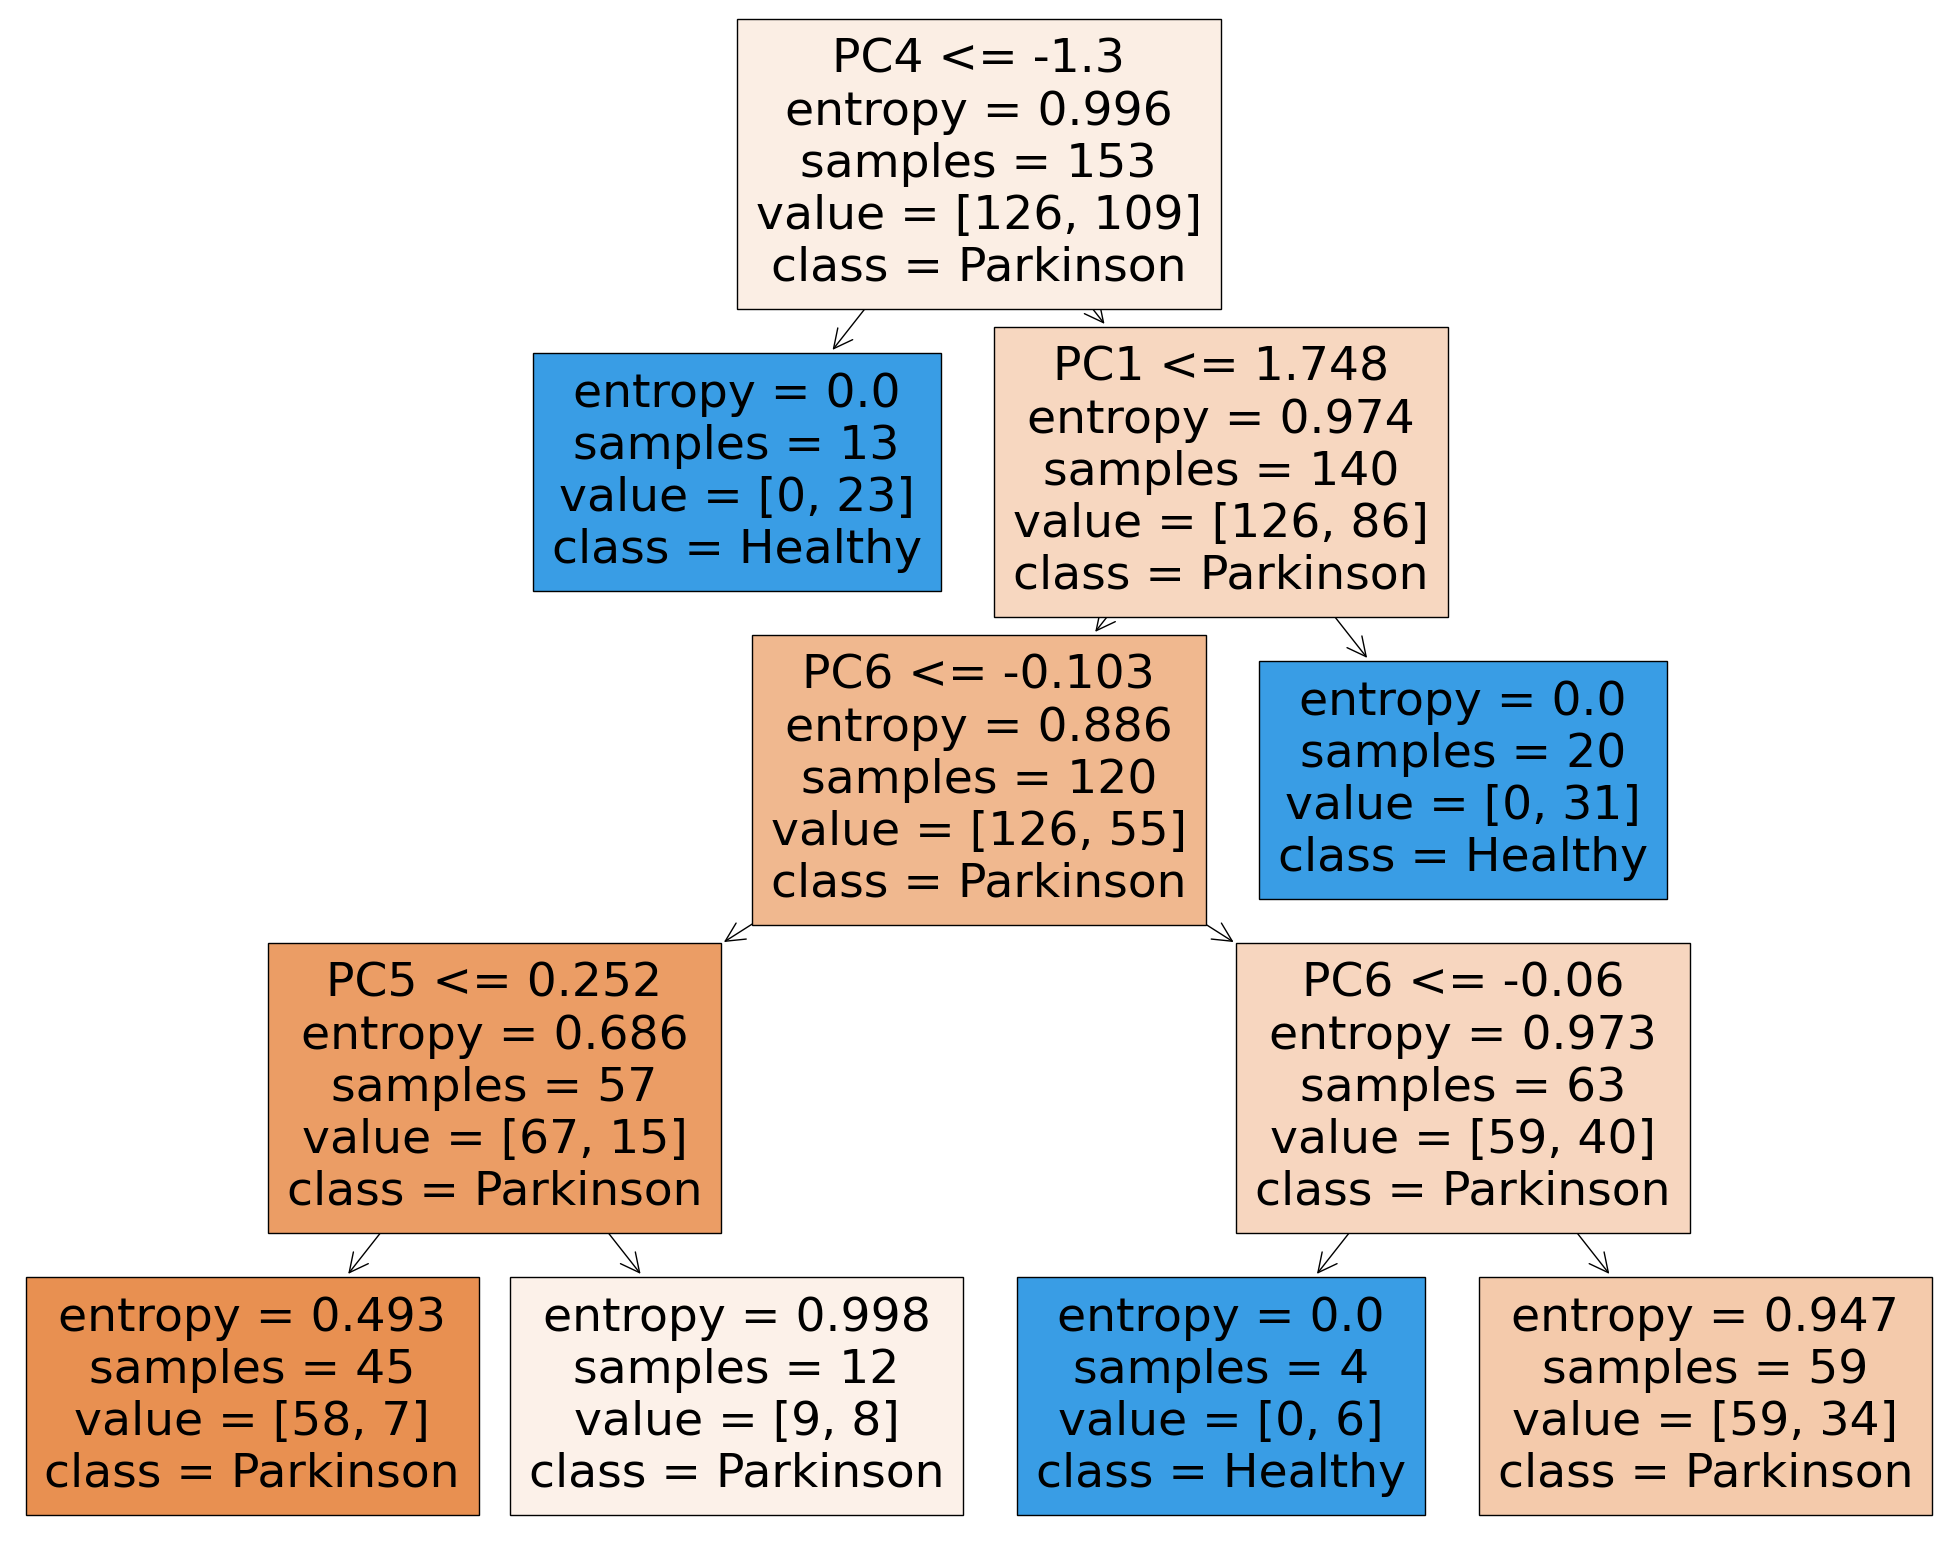

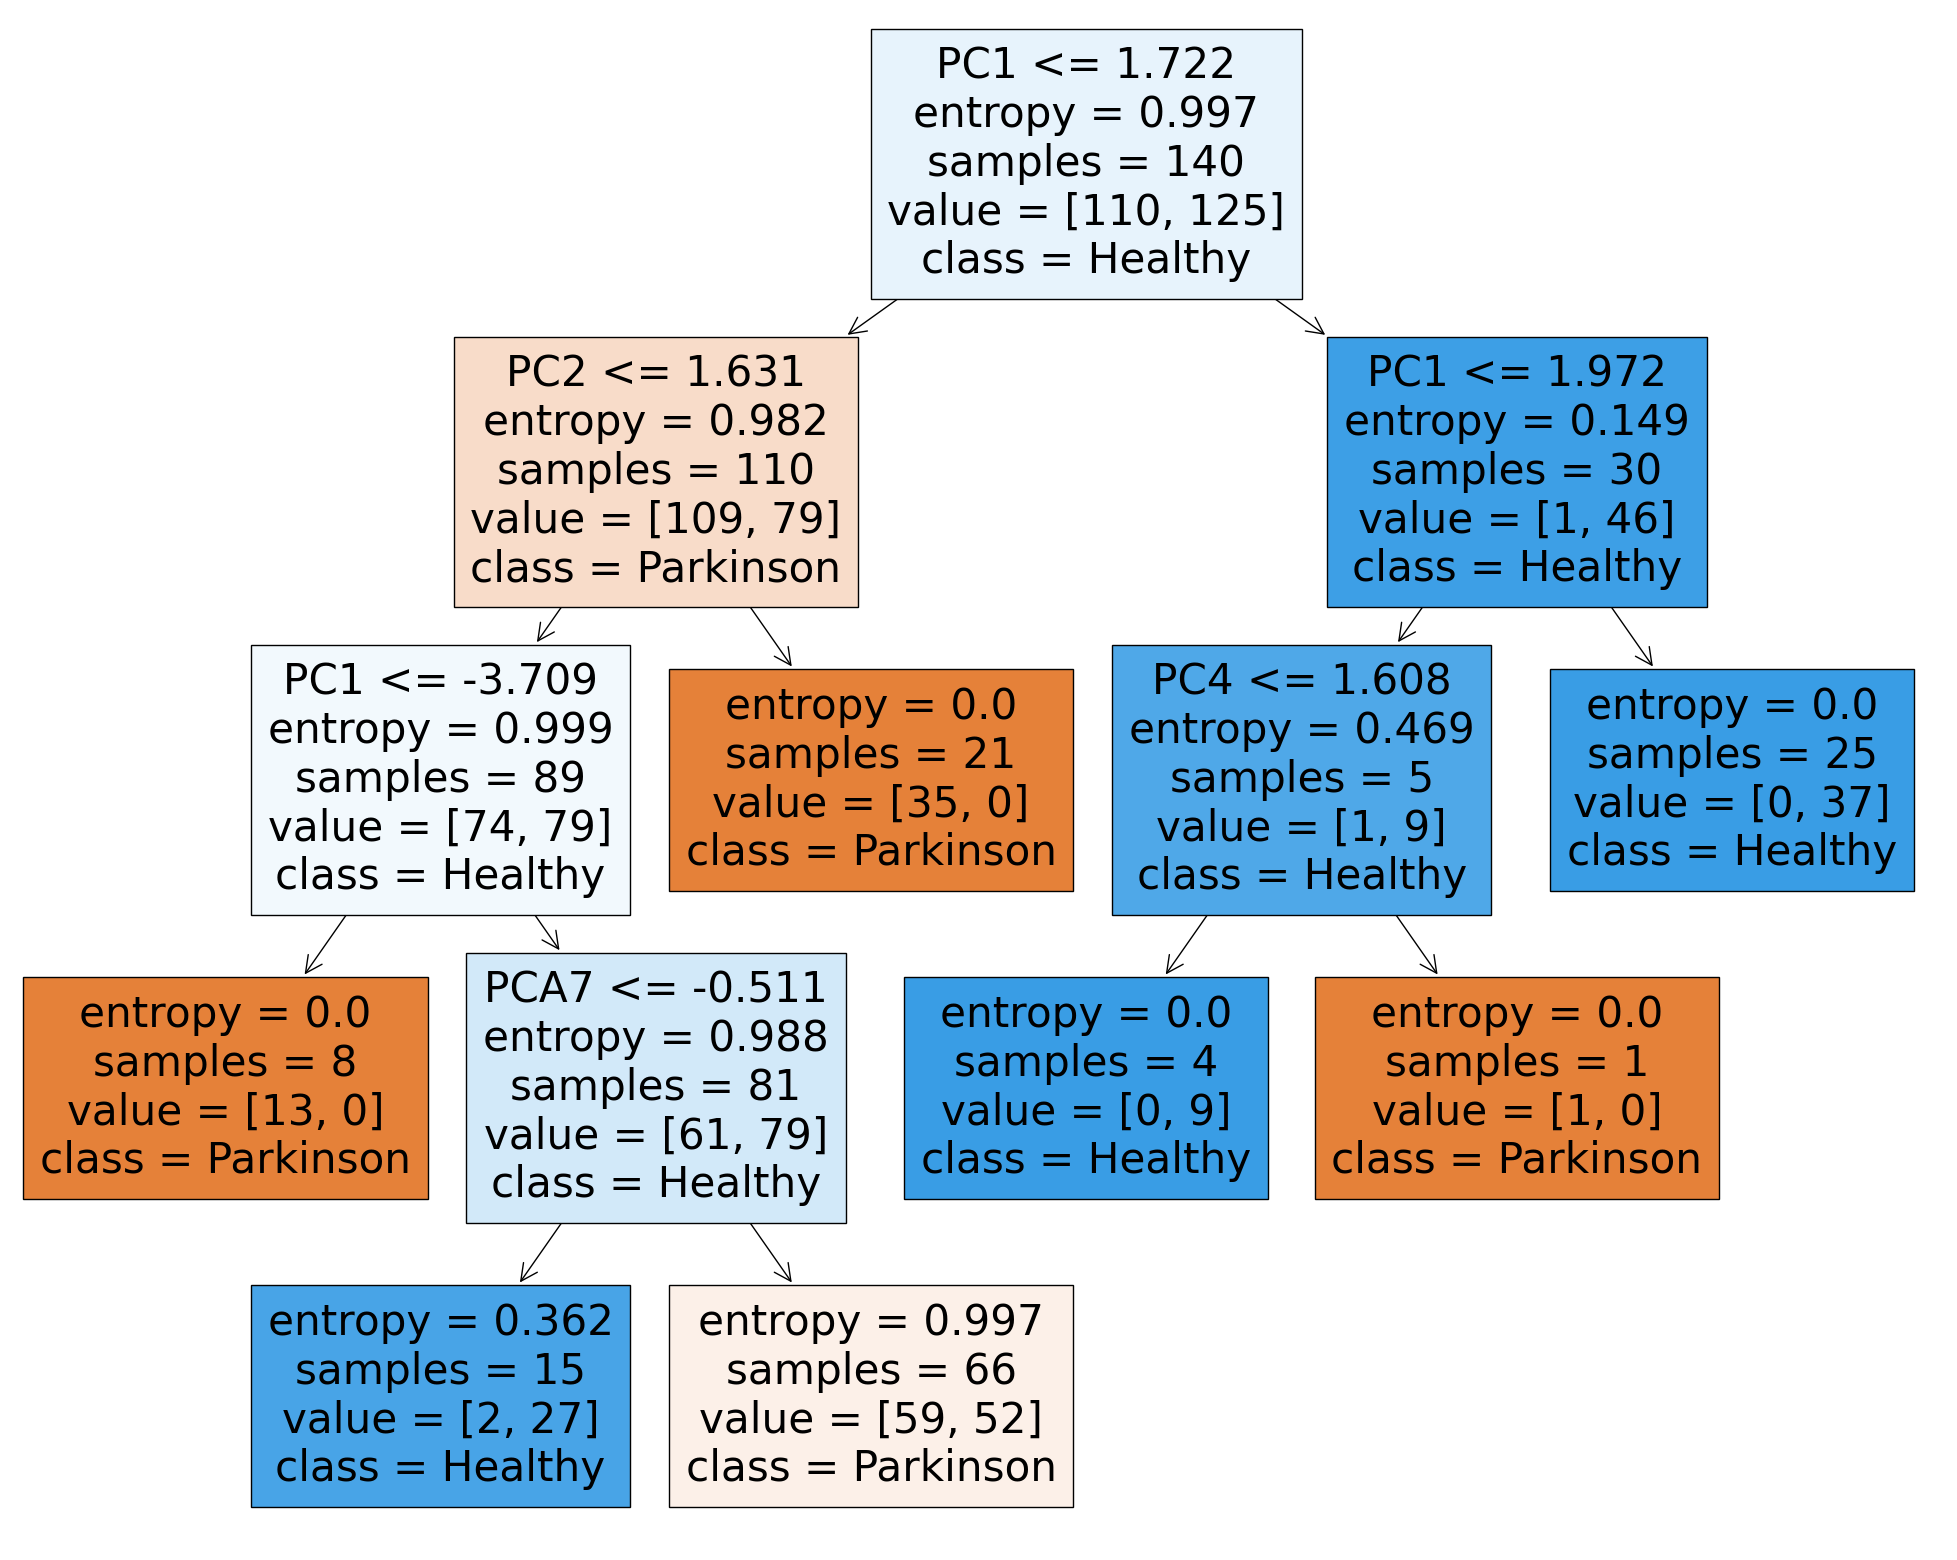

In [201]:
from sklearn import tree

# feature_names=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
#        'MDVP:Shimmer', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2']
feature_names=X.columns
target_names=['Parkinson', 'Healthy']

# showing 10 of the trees out of 100 trees
# generated by random forest classifier.
for i in range(0,10):
       fig = plt.figure(figsize=(25, 20))
       _ = tree.plot_tree(rf_model[i], 
                            feature_names=feature_names,
                            class_names=target_names,
                     filled=True)
       plt.show()



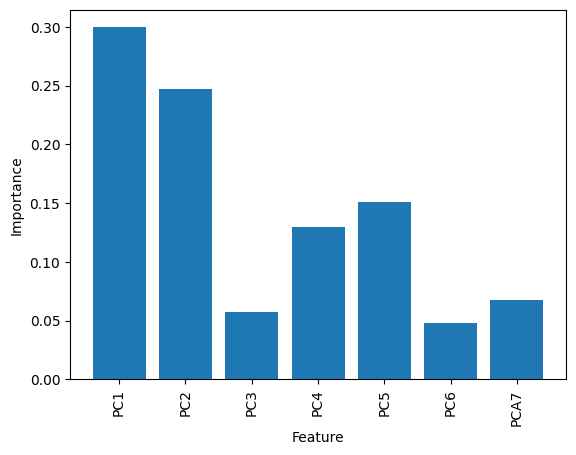

In [202]:
# get the feature importances
importances = rf_model.feature_importances_

# create a bar chart of the feature importances
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [203]:
list(zip(X.columns,importances))

[('PC1', 0.2996390419198852),
 ('PC2', 0.2468725271010154),
 ('PC3', 0.057729659345234496),
 ('PC4', 0.12933717718925233),
 ('PC5', 0.15084625560993484),
 ('PC6', 0.048188929163993297),
 ('PCA7', 0.06738640967068445)]

Model Evaluation

In [204]:
Y_pred= rf_model.predict(X_train)
Y_pred_test= rf_model.predict(X_test)

In [205]:
Model_Evaluation(Y_train,Y_pred)

True Positive 111
False Positive 1
True Negative 116
False Negative 7
Accuracy:  0.9659574468085106
Precision:  0.9910714285714286
Recall:  0.940677966101695
F1_score:  0.9652173913043479
confusion matrix
 [[116   1]
 [  7 111]]


In [206]:
Model_Evaluation(Y_test,Y_pred_test)

True Positive 29
False Positive 0
True Negative 30
False Negative 0
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1_score:  1.0
confusion matrix
 [[30  0]
 [ 0 29]]


Save the model

In [207]:
save_model(rf_model,"PCARandomForestModel.pkl")

Building a Predictive system

In [208]:
RFModel= load_model("PCARandomForestModel.pkl")


In [209]:
# change input_data to numpy array
inp_data= np.asarray(input_data)

# reshape
inp_data_reshape= inp_data.reshape(4,-4)


pred = RFModel.predict(inp_data_reshape)

c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [210]:
pred

array([1, 0, 0, 0], dtype=int64)

In [211]:
output_data

128    1
206    0
219    0
7      1
Name: status, dtype: int64

# XgBoost Model



In [ ]:
# Initialize the XGBoost classifier
from sklearn.metrics import f1_score, precision_score, recall_score

def Kfold_XGBClassifier():
    clf = XGBClassifier(max_depth=4,random_state=2,n_estimators=100)

    # Define the number of folds (k)
    k = 5

    # Initialize KFold cross-validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize lists to store performance metrics
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # Fit the classifier to the training data
        clf.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = clf.predict(X_test)
        
        # Calculate performance metrics (accuracy, precision, recall, F1-score)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Append metrics to the lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Calculate and print the mean performance metrics across folds
    mean_accuracy = np.mean(accuracies)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_f1_score = np.mean(f1_scores)

    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Mean Precision: {mean_precision}")
    print(f"Mean Recall: {mean_recall}")
    print(f"Mean F1 Score: {mean_f1_score}")

In [246]:
# Kfold_XGBClassifier()

In [213]:
xg_model= XGBClassifier(max_depth=4,random_state=2,n_estimators=100)
xg_model.fit (X_train,Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [214]:
Y_pred=xg_model.predict(X_train)
Y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [215]:
training_data_accuracy = accuracy_score(Y_train,Y_pred)
print("accuracy_score of training data= ",training_data_accuracy)

accuracy_score of training data=  1.0


In [216]:
Y_pred_test=xg_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,Y_pred_test)
print("accuracy_score of testing data= ",test_data_accuracy)

accuracy_score of testing data=  1.0


In [217]:
Model_Evaluation(Y_train,Y_pred)

True Positive 118
False Positive 0
True Negative 117
False Negative 0
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1_score:  1.0
confusion matrix
 [[117   0]
 [  0 118]]


In [218]:
Model_Evaluation(Y_test,Y_pred_test)

True Positive 29
False Positive 0
True Negative 30
False Negative 0
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1_score:  1.0
confusion matrix
 [[30  0]
 [ 0 29]]


Train data is overfitting the model

In [1]:
# Kfold_XGBClassifier()

In [220]:
save_model(xg_model,"PCAXGBClassifier_Model.pkl")

In [221]:
# load model
XGBModel= load_model("PCAXGBClassifier_Model.pkl")

# change input_data to numpy array
inp_data= np.asarray(input_data)

# reshape
inp_data_reshape= inp_data.reshape(4,-4)

pred = XGBModel.predict(inp_data_reshape)

In [222]:
pred

array([1, 0, 0, 1])

In [223]:
output_data

128    1
206    0
219    0
7      1
Name: status, dtype: int64

# SVM (Support Vector Machine) Classifier Model

Model training

In [224]:
svm_model= svm.SVC(kernel="linear") # Support vector classifier 

In [225]:
svm_model.fit (X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [226]:
Y_pred=svm_model.predict(X_train)


In [227]:
Y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [228]:
training_data_accuracy = accuracy_score(Y_train,Y_pred)
print("accuracy_score of training data= ",training_data_accuracy)

accuracy_score of training data=  0.8595744680851064


In [229]:
Y_pred_test=svm_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,Y_pred_test)
print("accuracy_score of testing data= ",test_data_accuracy)

accuracy_score of testing data=  0.9152542372881356


In [230]:
Model_Evaluation(Y_train,Y_pred)

True Positive 94
False Positive 9
True Negative 108
False Negative 24
Accuracy:  0.8595744680851064
Precision:  0.912621359223301
Recall:  0.7966101694915254
F1_score:  0.8506787330316742
confusion matrix
 [[108   9]
 [ 24  94]]


In [231]:
Model_Evaluation(Y_test,Y_pred_test)


True Positive 25
False Positive 1
True Negative 29
False Negative 4
Accuracy:  0.9152542372881356
Precision:  0.9615384615384616
Recall:  0.8620689655172413
F1_score:  0.9090909090909091
confusion matrix
 [[29  1]
 [ 4 25]]


In [232]:
# save svm model

save_model(svm_model,"PCASVM_Classifier_Model.pkl")

Building a predictive system

In [233]:
input_data

PC1       PC2       PC3       PC4       PC5       PC6      PCA7
128 -2.256093 -0.956752 -0.652615  1.080035 -0.423248  0.291802 -0.962532
206 -1.213822  1.368709 -0.198625  0.104214 -0.308812  1.317342 -0.351175
219 -0.092440  1.118392 -1.241210 -0.024089 -0.064741  0.841987 -0.272677
7   -1.598770 -2.471398 -0.174353  0.236727 -0.920325 -0.398643  0.269839

In [234]:
# load model
SVMModel= load_model("PCASVM_Classifier_Model.pkl")

In [235]:
# change input_data to numpy array
inp_data= np.asarray(input_data)

In [236]:
inp_data

array([[-2.25609292, -0.95675208, -0.65261538,  1.08003475, -0.4232483 ,
         0.29180238, -0.96253202],
       [-1.21382222,  1.36870927, -0.19862512,  0.10421367, -0.30881167,
         1.31734225, -0.35117472],
       [-0.09244025,  1.11839159, -1.24120957, -0.02408884, -0.06474069,
         0.84198717, -0.27267687],
       [-1.59876961, -2.4713976 , -0.17435269,  0.23672731, -0.92032516,
        -0.39864328,  0.26983868]])

In [237]:
# reshape
inp_data_reshape= inp_data.reshape(4,-4)

In [238]:
inp_data_reshape

array([[-2.25609292, -0.95675208, -0.65261538,  1.08003475, -0.4232483 ,
         0.29180238, -0.96253202],
       [-1.21382222,  1.36870927, -0.19862512,  0.10421367, -0.30881167,
         1.31734225, -0.35117472],
       [-0.09244025,  1.11839159, -1.24120957, -0.02408884, -0.06474069,
         0.84198717, -0.27267687],
       [-1.59876961, -2.4713976 , -0.17435269,  0.23672731, -0.92032516,
        -0.39864328,  0.26983868]])

In [239]:
pred = SVMModel.predict(inp_data_reshape)

c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [240]:
pred

array([0, 0, 0, 0], dtype=int64)

In [241]:
output_data

128    1
206    0
219    0
7      1
Name: status, dtype: int64